In [468]:
import warnings
warnings.filterwarnings('ignore')

In [572]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing  import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree
from sklearn import ensemble
from collections import Counter

%matplotlib inline

In [470]:
df = pd.read_csv('E:\# DATA SCIENCE\CApstone project\cardiovascular risk prediction\data_cardiovascular_risk.csv')

In [471]:
df

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

In [472]:
train_df = df

In [473]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [474]:
train_df.describe(include='all').T

count unique  top  freq        mean         std    min  \
id               3390.0    NaN  NaN   NaN      1694.5  978.753033    0.0   
age              3390.0    NaN  NaN   NaN   49.542183    8.592878   32.0   
education        3303.0    NaN  NaN   NaN    1.970936    1.019081    1.0   
sex                3390      2    F  1923         NaN         NaN    NaN   
is_smoking         3390      2   NO  1703         NaN         NaN    NaN   
cigsPerDay       3368.0    NaN  NaN   NaN    9.069477   11.879078    0.0   
BPMeds           3346.0    NaN  NaN   NaN    0.029886    0.170299    0.0   
prevalentStroke  3390.0    NaN  NaN   NaN     0.00649    0.080309    0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.315339    0.464719    0.0   
diabetes         3390.0    NaN  NaN   NaN    0.025664    0.158153    0.0   
totChol          3352.0    NaN  NaN   NaN  237.074284    45.24743  107.0   
sysBP            3390.0    NaN  NaN   NaN   132.60118    22.29203   83.5   
diaBP            3390.0    NaN  NaN   NaN   82.883038   12.023581   48.0   
BMI              3376.0    NaN  NaN   NaN   25.794964    4.115449  15.96   
heartRate        3389.0    NaN  NaN   NaN   75.977279   11.971868   45.0   
glucose          3086.0    NaN  NaN   NaN    82.08652   24.244753   40.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.150737    0.357846    0.0   

                    25%     50%      75%     max  
id               847.25  1694.5  2541.75  3389.0  
age                42.0    49.0     56.0    70.0  
education           1.0     2.0      3.0     4.0  
sex                 NaN     NaN      NaN     NaN  
is_smoking          NaN     NaN      NaN     NaN  
cigsPerDay          0.0     0.0     20.0    70.0  
BPMeds              0.0     0.0      0.0     1.0  
prevalentStroke     0.0     0.0      0.0     1.0  
prevalentHyp        0.0     0.0      1.0     1.0  
diabetes            0.0     0.0      0.0     1.0  
totChol           206.0   234.0    264.0   696.0  
sysBP             117.0   128.5    144.0   295.0  
diaBP              74.5    82.0     90.0   142.5  
BMI               23.02   25.38    28.04    56.8  
heartRate          68.0    75.0     83.0   143.0  
glucose            71.0    78.0     87.0   394.0  
TenYearCHD          0.0     0.0      0.0     1.0

In [475]:
#as we can see there is 3390 rows and 17 columns with different medical data like is person smoker,
#how many cigs per day, is he on bp meds or not
# this dataset contains some missing values and some categorical values 

In [476]:
# TO see missing values 
train_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [479]:
#dropping missing values 
train_df.dropna(inplace=True)

In [477]:
# most machine learning algorithms cannot handle categorical data very well 
# so we need to know what categorical data our dataset contains 

In [480]:
# Value counts of the categorical and numerical features 
for i in df.columns:
  print({i:df[i].nunique()})

{'id': 2927}
{'age': 39}
{'education': 4}
{'sex': 2}
{'is_smoking': 2}
{'cigsPerDay': 31}
{'BPMeds': 2}
{'prevalentStroke': 2}
{'prevalentHyp': 2}
{'diabetes': 2}
{'totChol': 232}
{'sysBP': 222}
{'diaBP': 138}
{'BMI': 1195}
{'heartRate': 67}
{'glucose': 127}
{'TenYearCHD': 2}


In [481]:
#defining numeric and categorical column to treat null values based on that
categorical_columns = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
numerical_columns = ['cigsPerDay','age','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [482]:
#checking the categories in each categorical column
for i in categorical_columns:
    print(i,df[i].value_counts().reset_index(),"\n")

education    index  education
0    1.0       1240
1    2.0        874
2    3.0        487
3    4.0        326 

sex   index   sex
0     F  1620
1     M  1307 

is_smoking   index  is_smoking
0    NO        1480
1   YES        1447 

BPMeds    index  BPMeds
0    0.0    2839
1    1.0      88 

prevalentStroke    index  prevalentStroke
0      0             2909
1      1               18 

prevalentHyp    index  prevalentHyp
0      0          2007
1      1           920 

diabetes    index  diabetes
0      0      2848
1      1        79 

TenYearCHD    index  TenYearCHD
0      0        2483
1      1         444 



In [483]:
# in binary "1" means "yes" and "0" means "no"
# in Ten year CHD 2879 parient out of 3890 are in "0" class and rest are in "1" class 

In [484]:
#EDA 

Shape of your Data Set loaded: (3390, 17)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    17 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['id']
Number of All Scatter Plots = 36


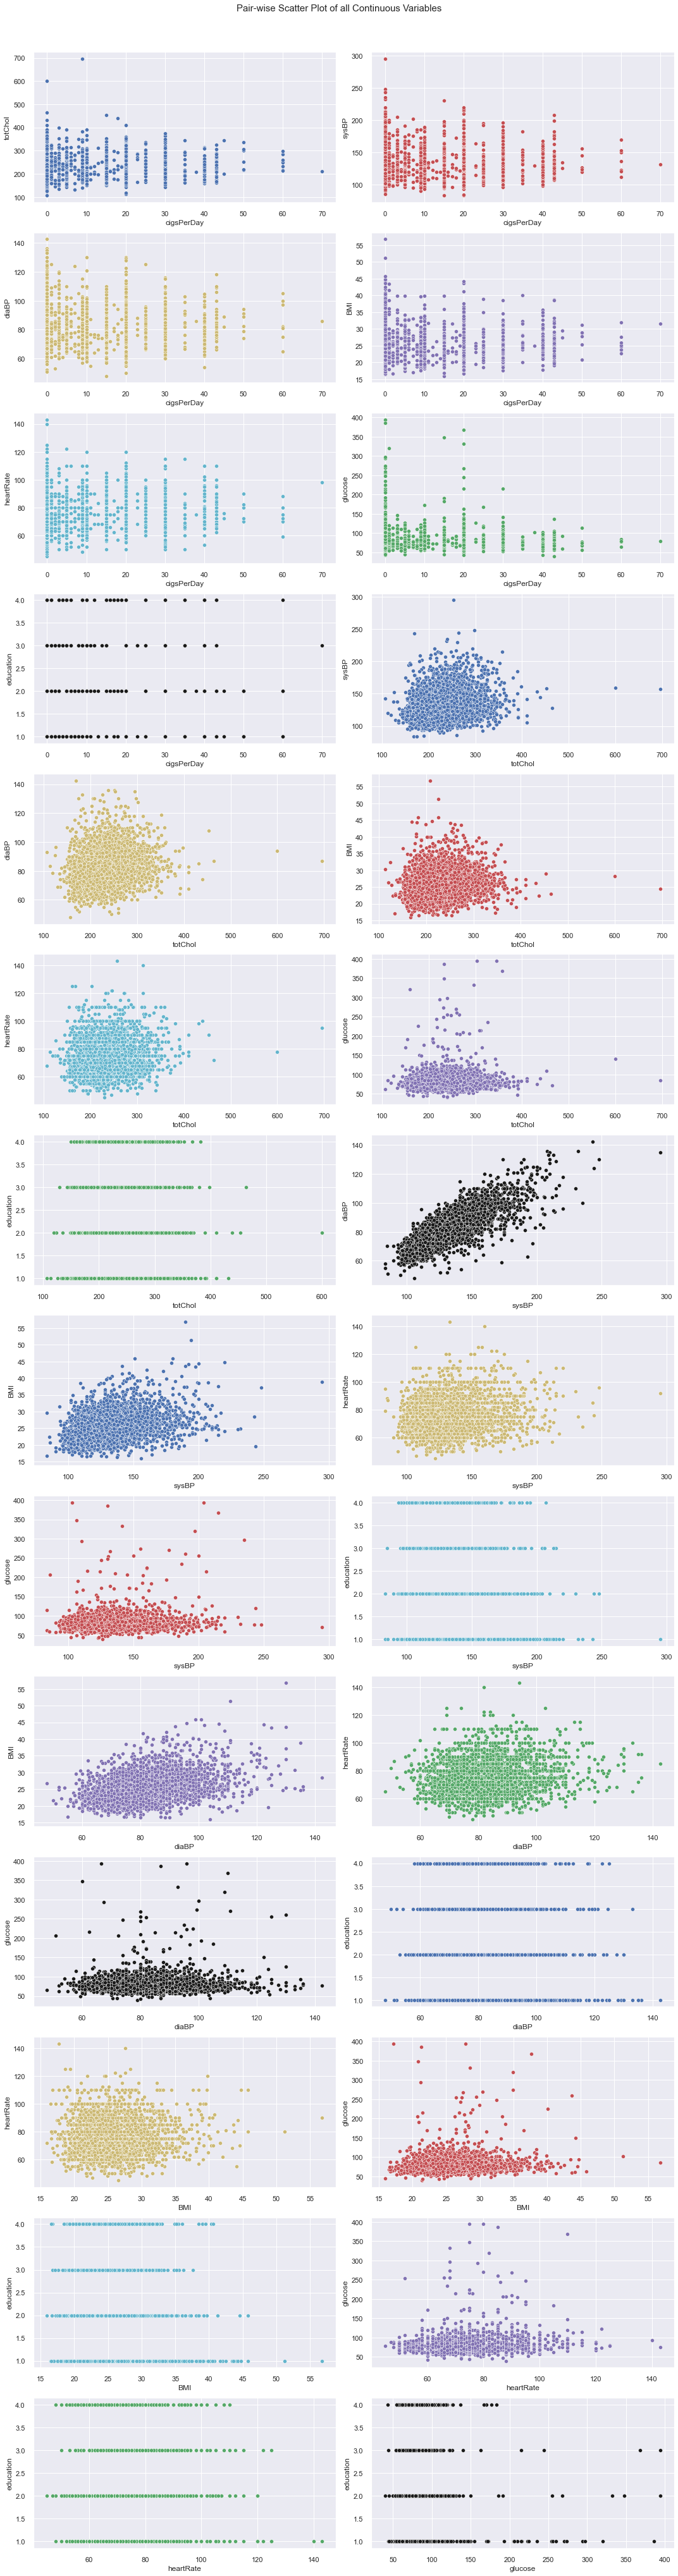

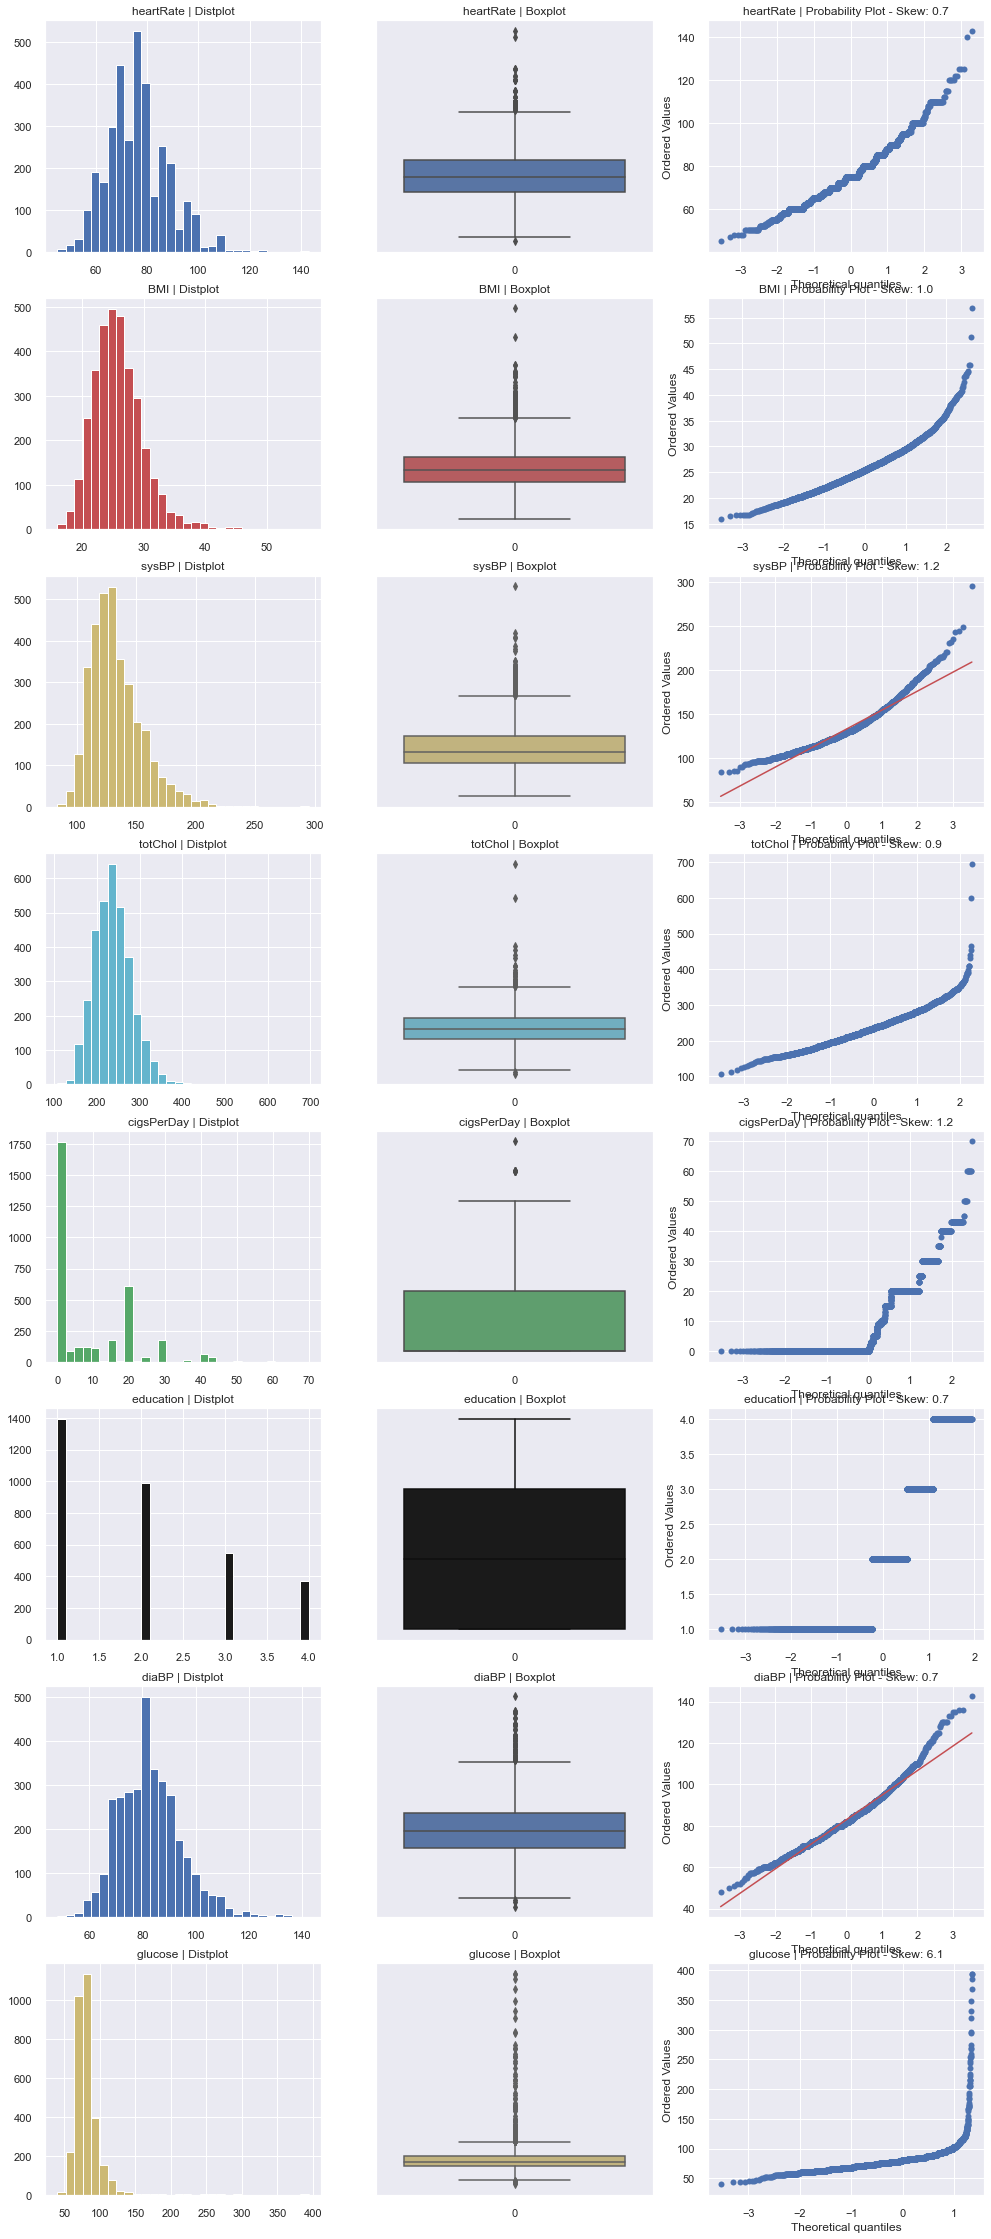

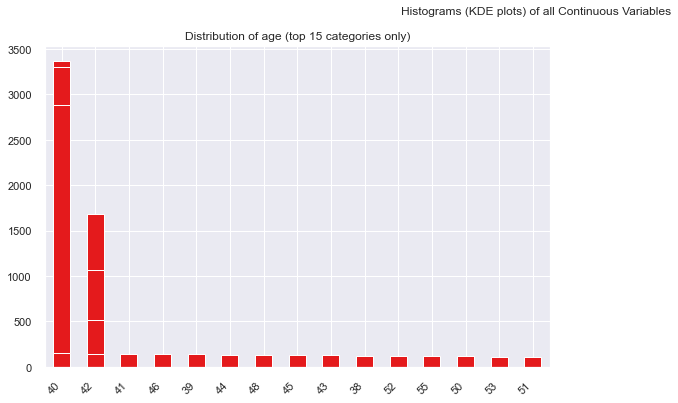

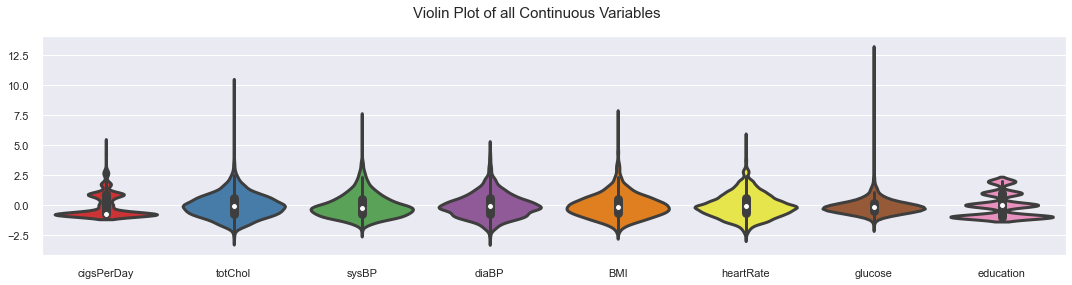

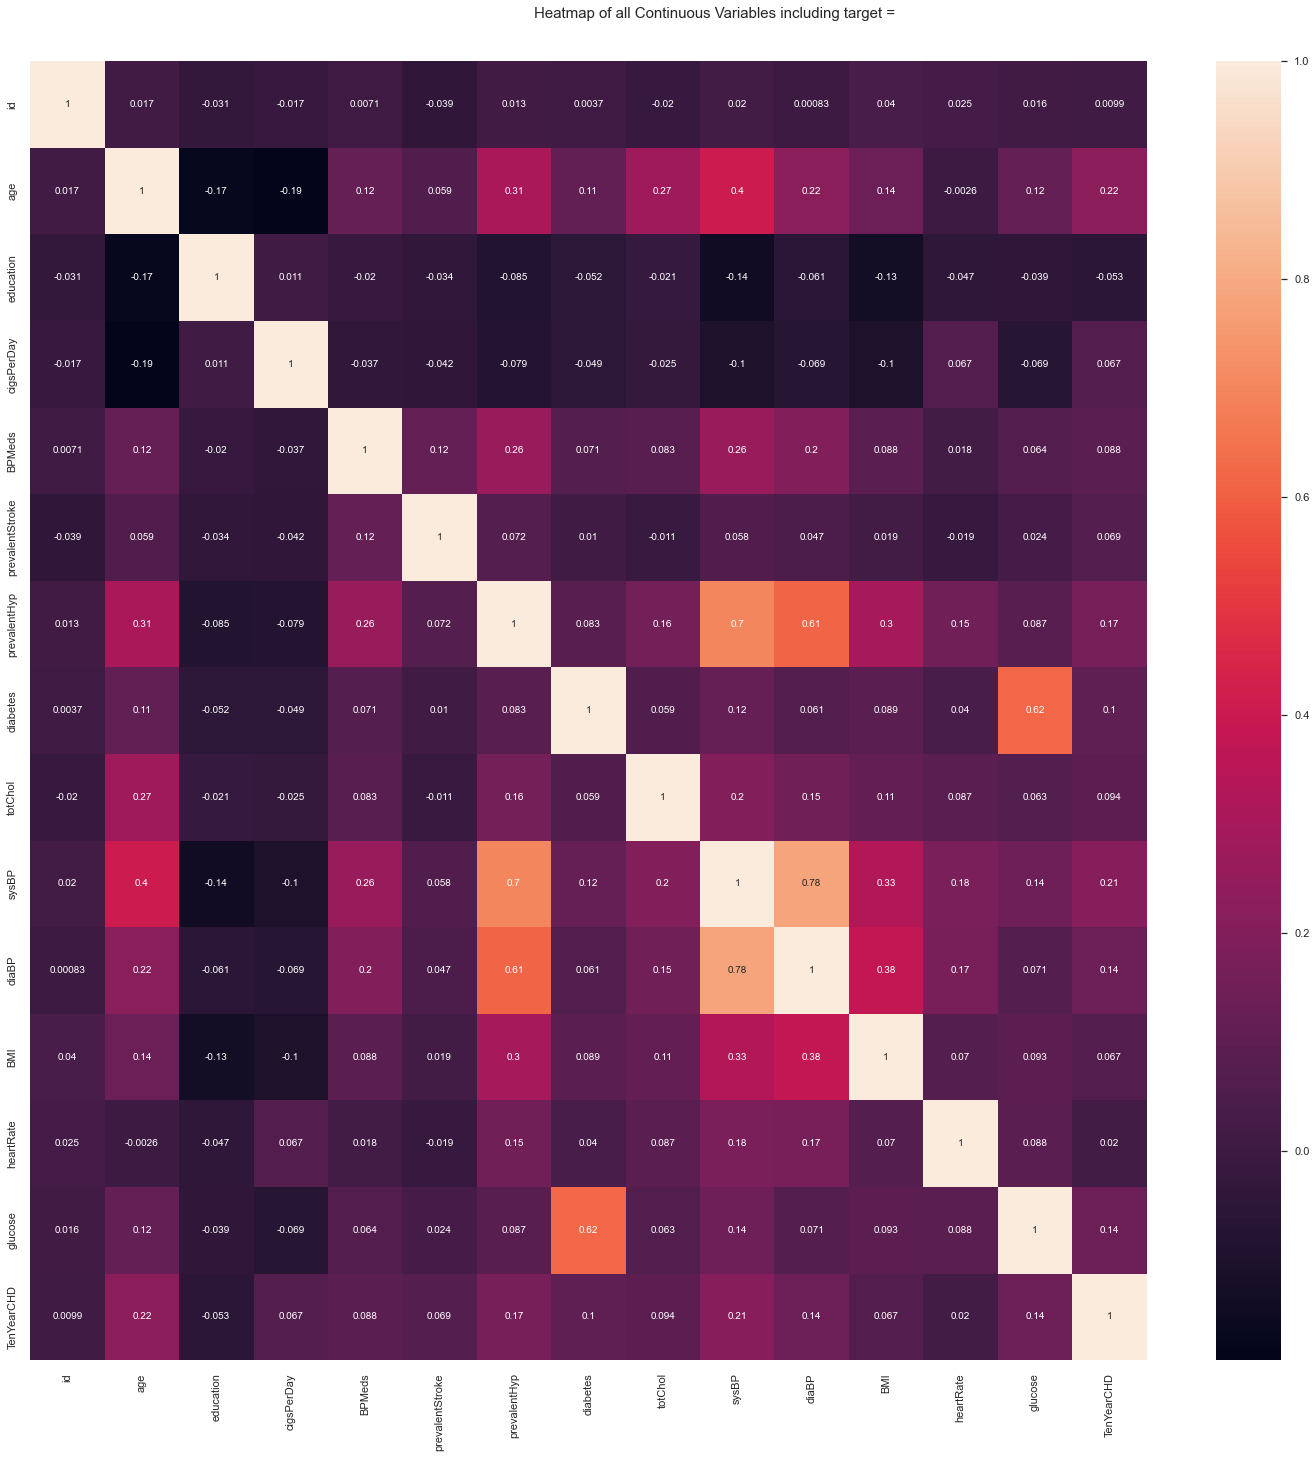

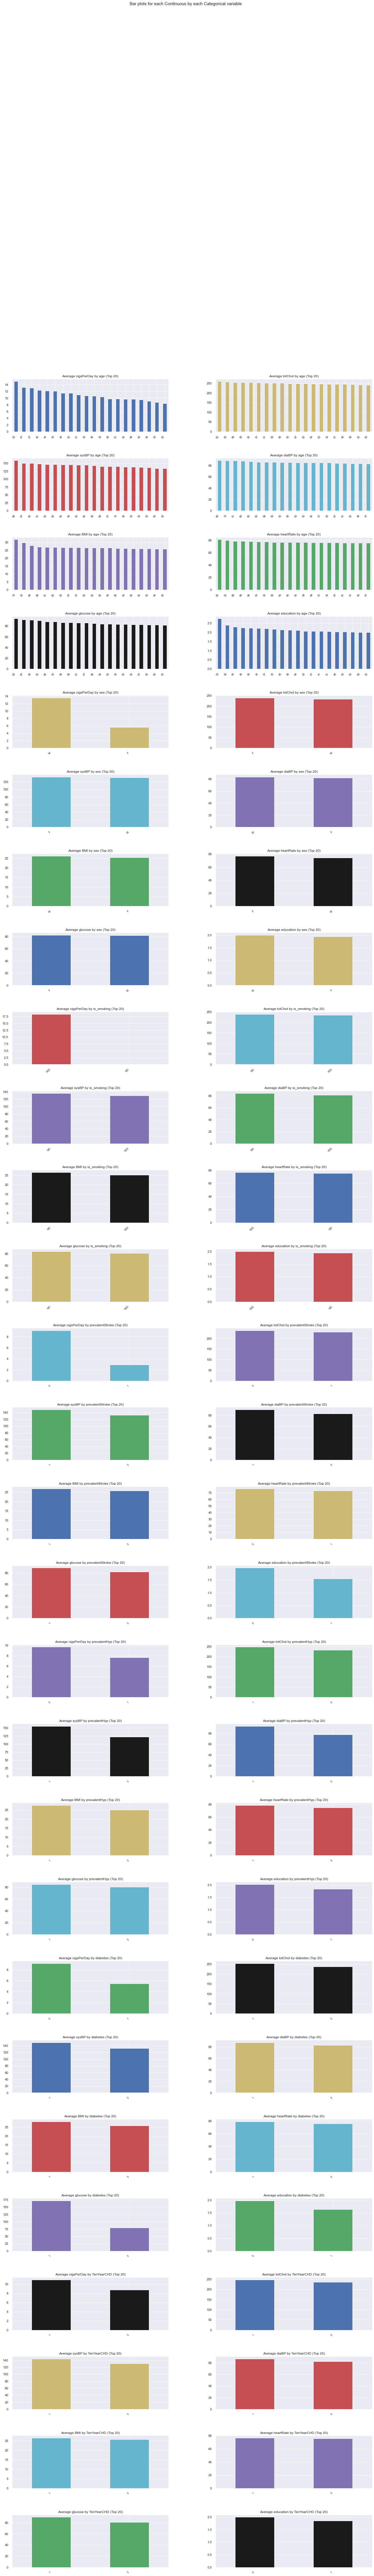

All Plots done
Time to run AutoViz = 24 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [485]:
#using autooviz library to get more insight from data 

from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('E:\\# DATA SCIENCE\\CApstone project\\cardiovascular risk prediction\\data_cardiovascular_risk.csv')

In [486]:
# missing values in dataset
train_df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<AxesSubplot: >

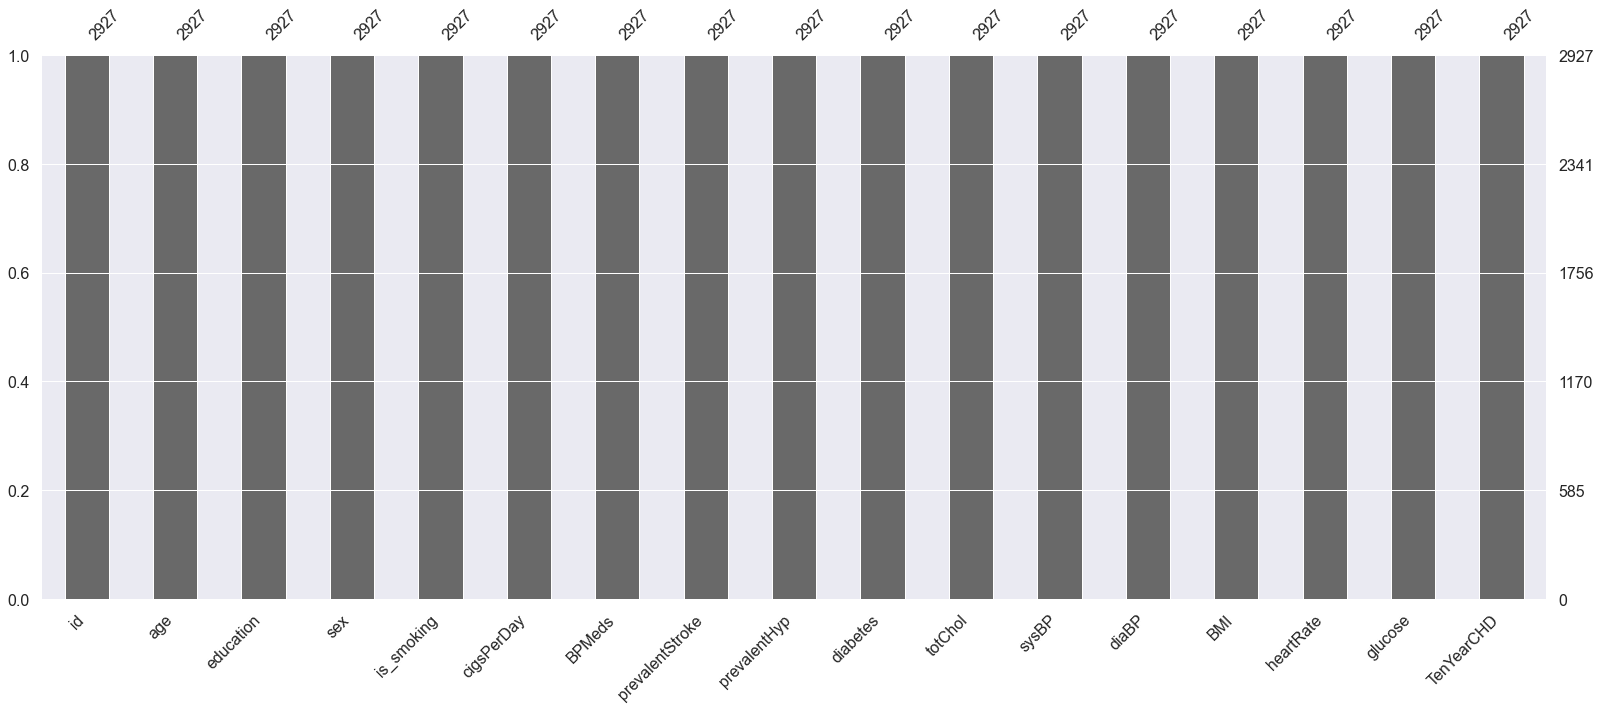

In [487]:
# to visualize missing data 
import missingno as msno
msno.bar(train_df)

In [252]:
# as we can see the most missing data available in Gluscose column, we will try to deal with it in later part. 

# Finding correalation in Dataset 

<AxesSubplot: >

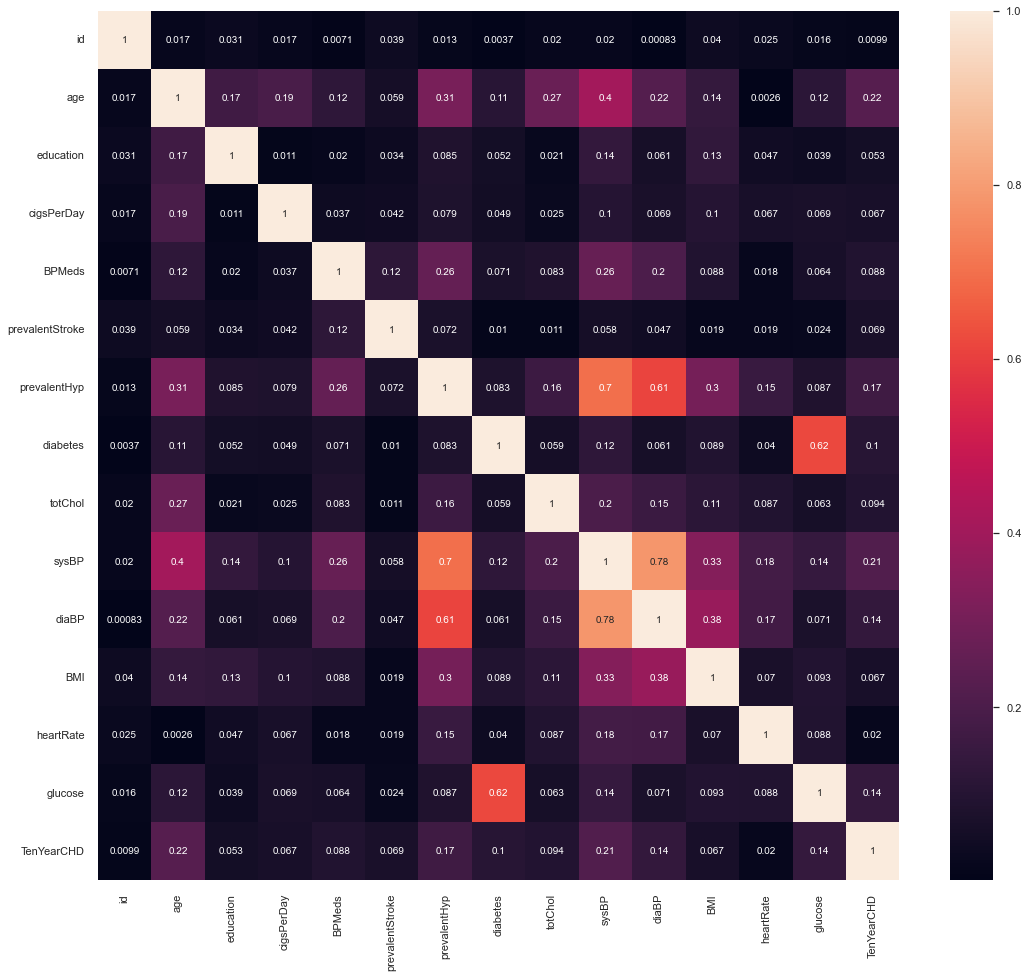

In [488]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(16,16))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)

In [316]:
# There is no significance correlation between variables 

# Finding outliers 

<AxesSubplot: >

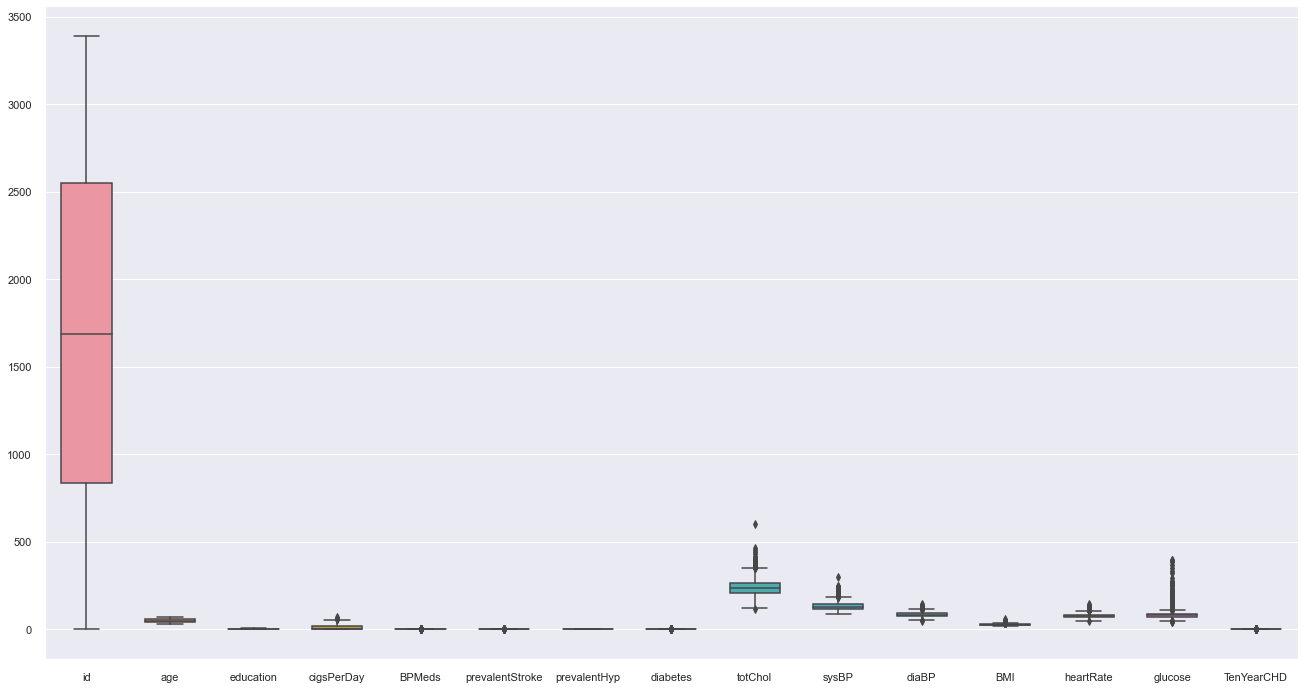

In [489]:
fig, ax = plt.subplots(figsize=(20,12))
sns.boxplot(data = train_df, width= 0.6)

There are outliers but within the possible range of values.


# Understanding the distribution Feature 
#Analysing data through pie chart 

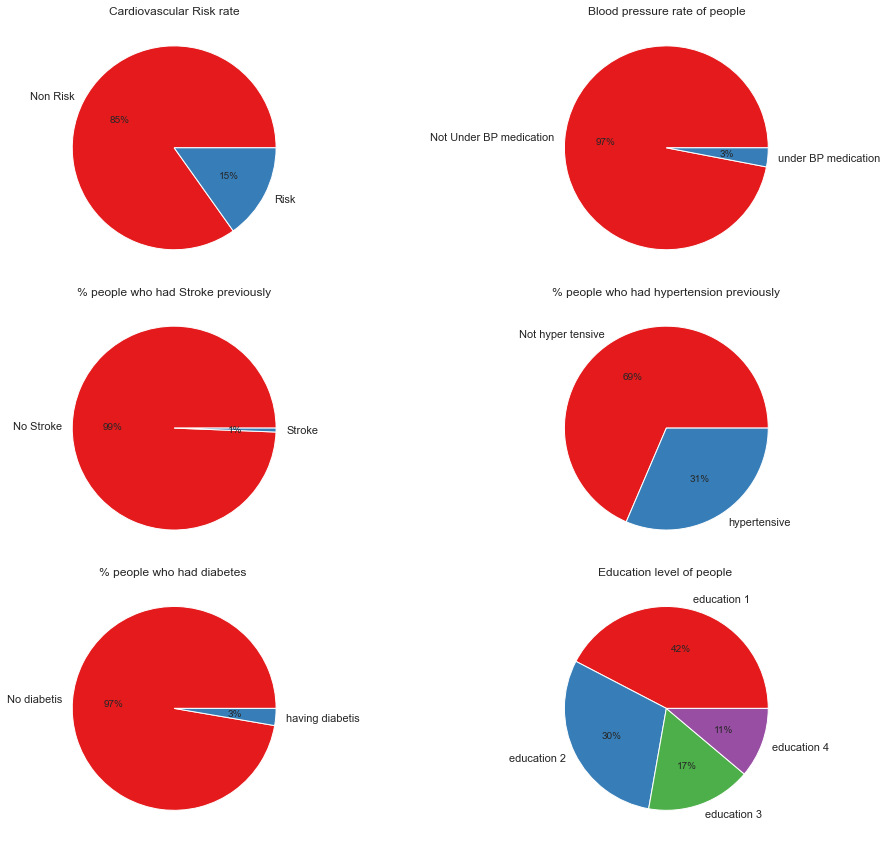

In [490]:
fig, ax = plt.subplots(figsize = (15, 15))

plt.subplot(3,2,1)
labels = 'Non Risk',"Risk"
plt.pie(train_df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Cardiovascular Risk rate")

plt.subplot(3,2,2)
labels = 'Not Under BP medication',"under BP medication"
plt.pie(train_df['BPMeds'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Blood pressure rate of people")

plt.subplot(3,2,3)
labels = 'No Stroke','Stroke'
plt.pie(train_df['prevalentStroke'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had Stroke previously")

plt.subplot(3,2,4)
labels = 'Not hyper tensive','hypertensive'
plt.pie(train_df['prevalentHyp'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had hypertension previously")

plt.subplot(3,2,5)
labels = 'No diabetis','having diabetis'
plt.pie(train_df['diabetes'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("% people who had diabetes ")

plt.subplot(3,2,6)
labels = 'education 1','education 2','education 3','education 4'
plt.pie(train_df['education'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Education level of people ")

plt.subplots_adjust(hspace= 0.1, wspace= 0.1)
plt.show()

**Now, we can conclude that,**

(1) There are 85% of people are actually not at risk of Cardio Vascular Risk.

(2) There are only 3% of people who are under BP medication.

(3) There are only 1% of people who had stroke previously.

(4) There are 32% of people who are having Hyper Tension.

(5) There are 97% of the people who are non diabetic.

(6) There are 11%(least) of the people are having highest level education and 42%(highest) of the people are having basic education level.

# The main numerical feature with respect to dependant variable 


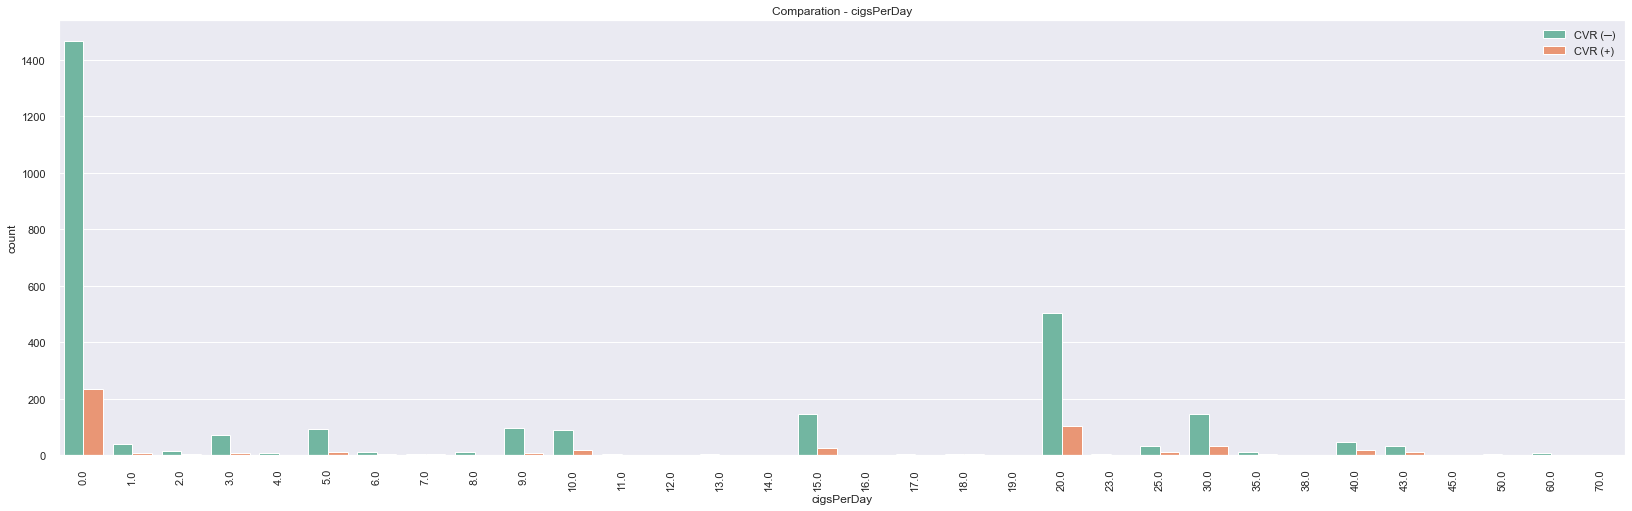

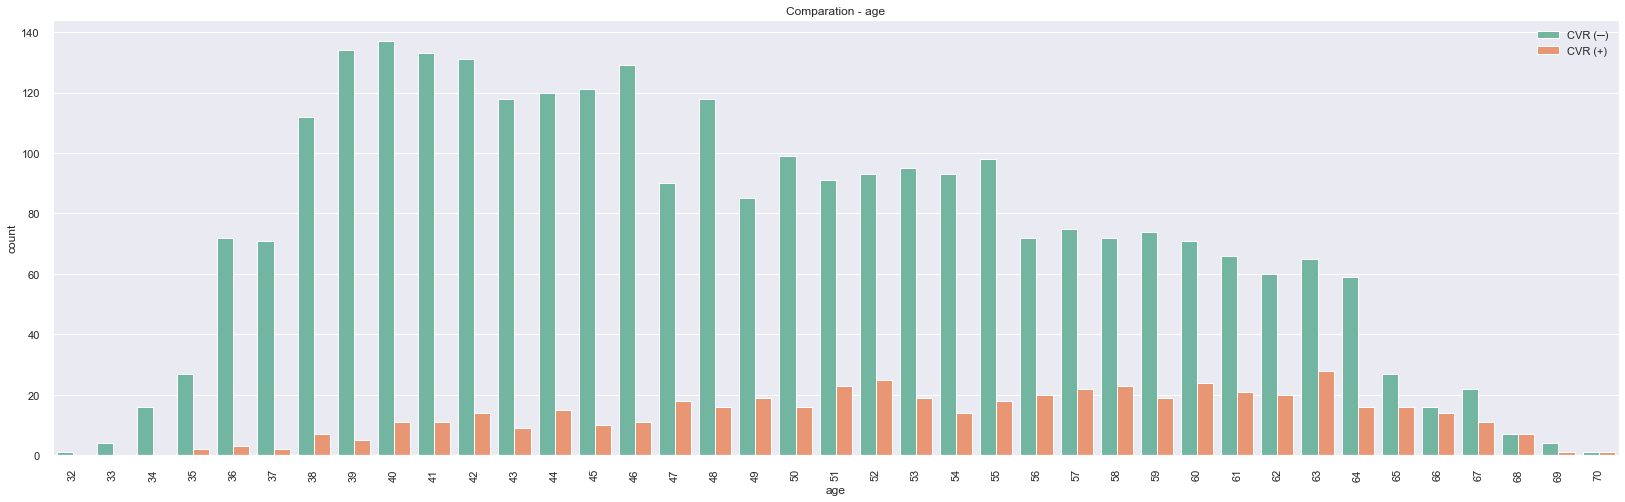

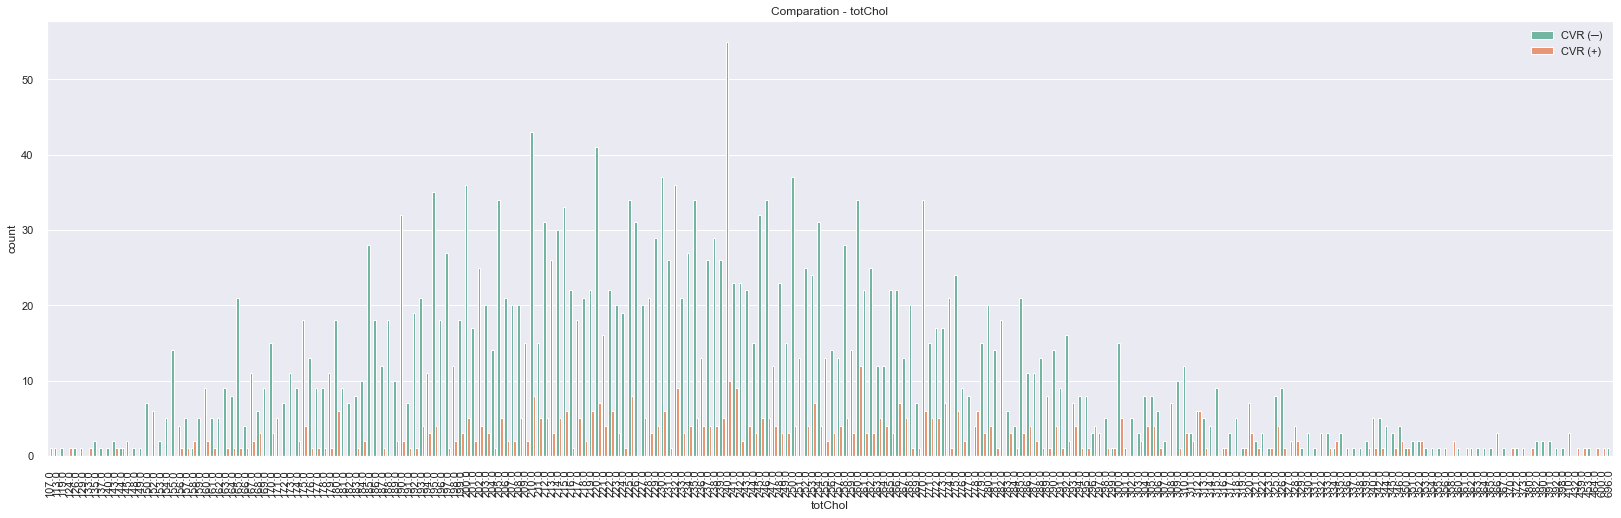

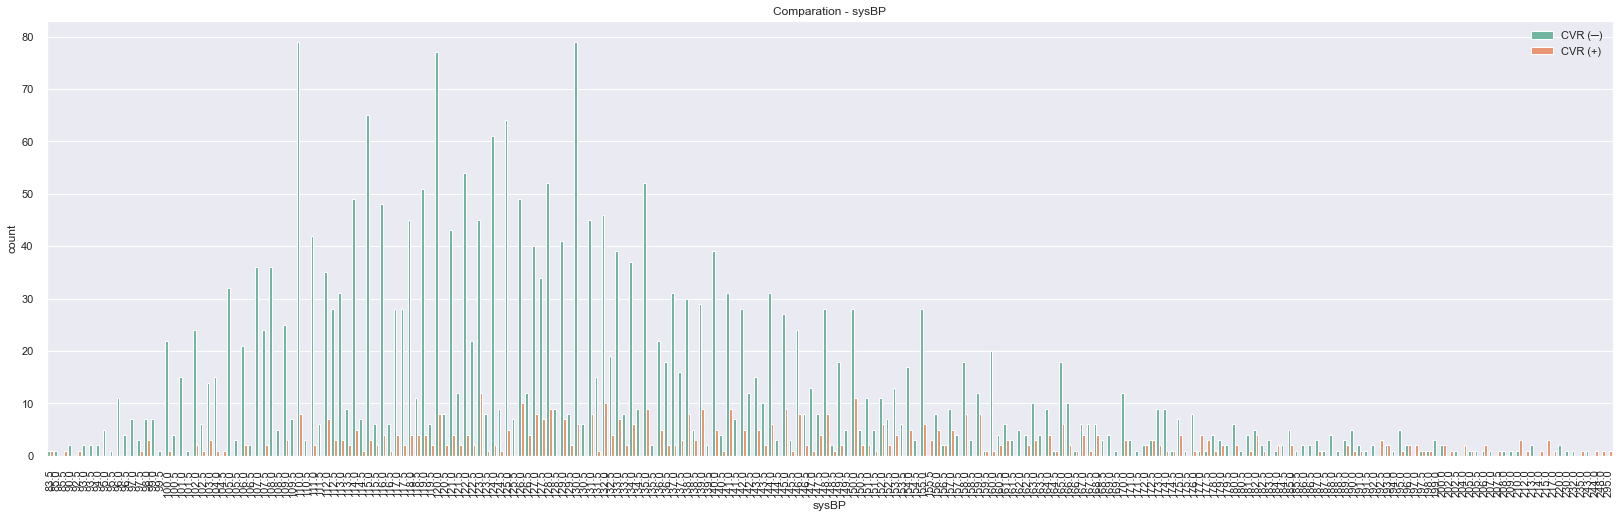

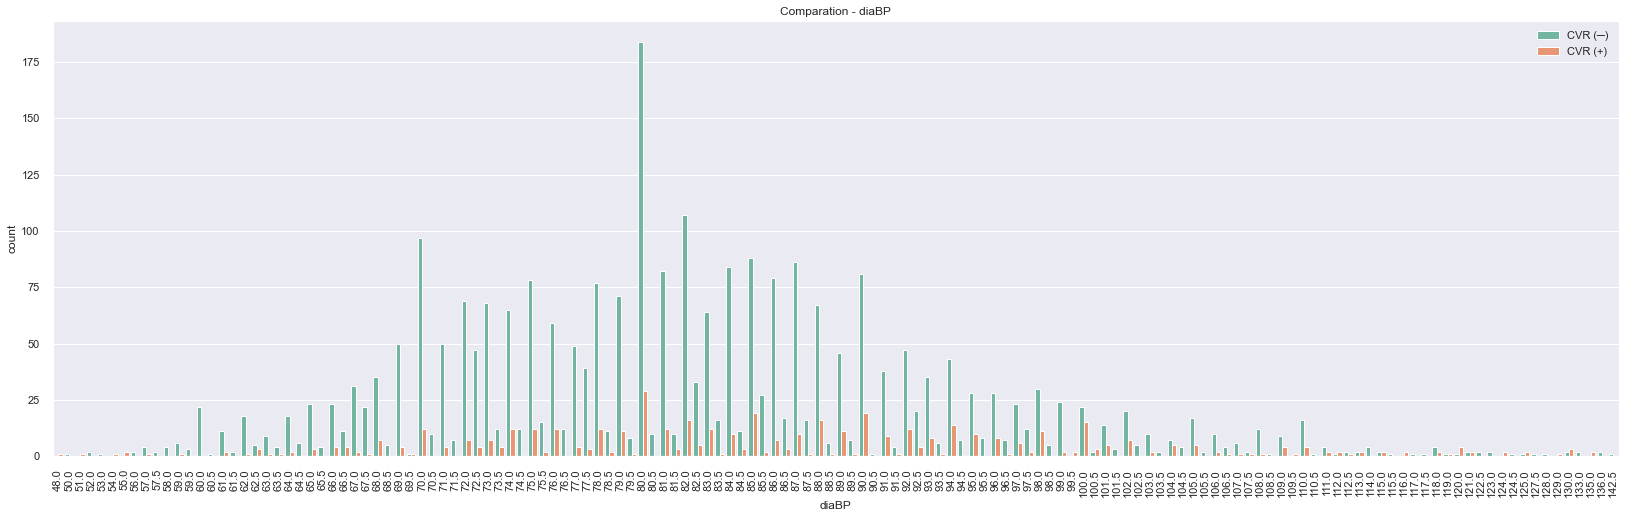

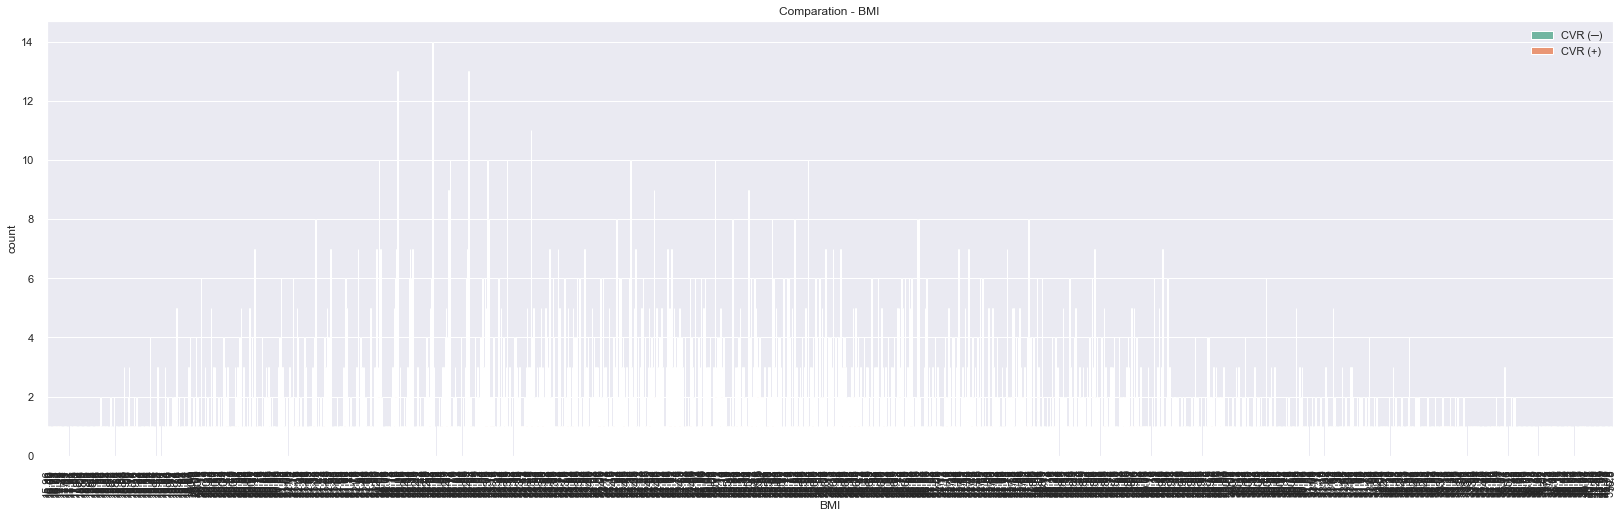

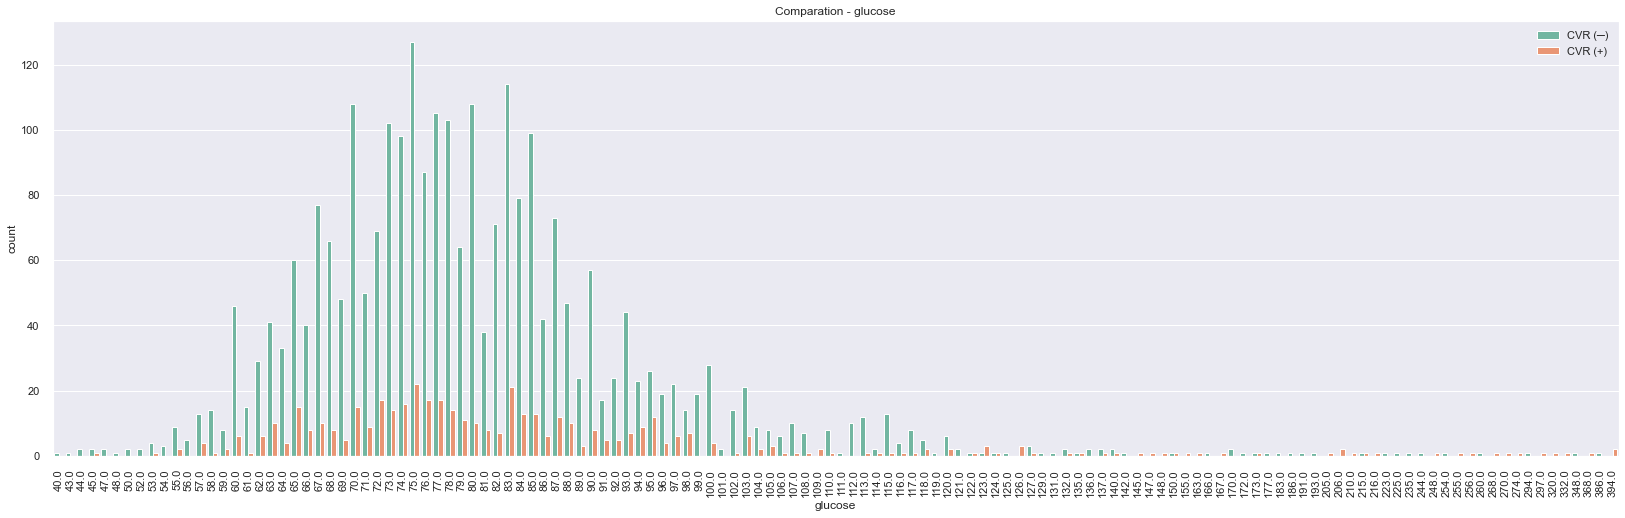

In [491]:
from matplotlib import rcParams

def NumPlot(df, col):
    # rcParams['figure.figsize'] = 25,8
    plt.figure(figsize=(25,8))
    plt.xticks(rotation=90)
    sns.countplot(x=col, hue='TenYearCHD', data = df, palette="Set2")
    plt.title('Comparation - {}'.format(col))
    plt.legend(['CVR (─)', 'CVR (+)'])

for i in numerical_columns:
  NumPlot(df,i)

**Here, we tried plotting all numerical varables with the dependent variables. From here we can conclude that,**

(1) The major people who are having Cardio Vasclar Risk(CVR) are at the age of 50-70.

(2) The cholestrol level of people is same for both kind of people who are at risk of CVR and not at risk of CVR. Instead fewer people who are not at risk of CVR are having high Cholestrol level.

(3) If we consider sysBP and diaBP together into consideration, then most of the people are having normal BP. So its hard to conclude to here about the CVR.

(4) Even though many people are having normal range of BMI, but the people whoevever are having high BMI, they are at risk of CVR.

(5) Many people are having normal heartrate range, so its not appropriate to come into conclusion about the CVR at this stage.

(6) In glucose level, we can see some outliers in both kind of people(whoa are at risk and not at risk). But the people who got high glucose level are coming into the category of CVR. So we can conclude that its even one of the factor which may contribute to CVR.

# Analysing the categorical features

**A)-UNIVARIATE ANALYSIS**

**Which gender is prone to coronary heart disease?**

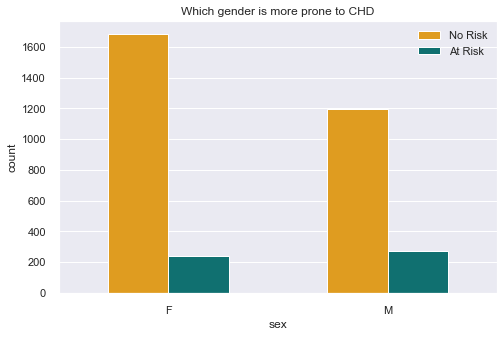

In [492]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (7,5))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette, width = 0.55)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

here female ratio greater in No risk comparitavely to men 

# Diabiatic patient risk to CHD

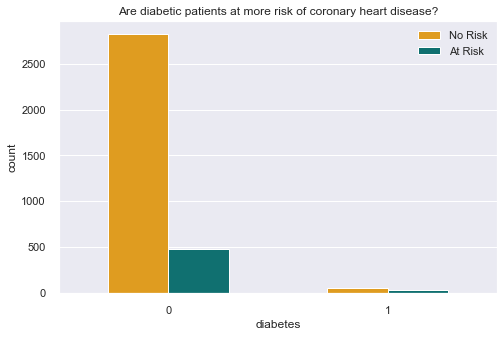

In [493]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (7,5))
sns.countplot(x = df['diabetes'], hue = df['TenYearCHD'], palette = my_palette, width = 0.55)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])

plt.show()

# Are smokers at more risk of coronary heart disease ??

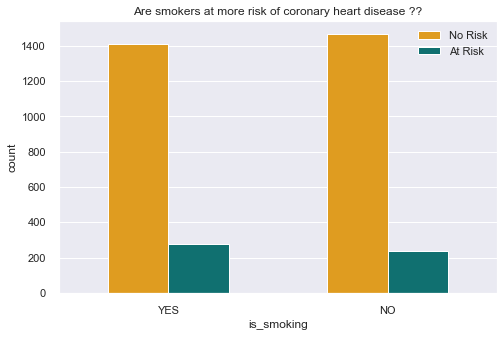

In [494]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (7,5))
sns.countplot(x = df['is_smoking'], hue = df['TenYearCHD'], palette = my_palette, width = 0.55)
plt.title("Are smokers at more risk of coronary heart disease ??")
plt.legend(['No Risk','At Risk'])
plt.show()

There is not enough difference to distinguish on the basis of smoking, the person who are non smoker is at no risk with little margin than person who is smoker

# Are hypertensive patients at more risk of coronary heart disease ??

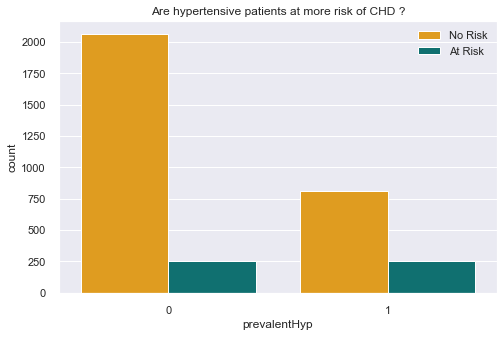

In [495]:
plt.figure(figsize = (7,5))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

# Is Heart rate is responsible for CHD ??

In [496]:
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

train_df['heartRateLabel'] = train_df.apply(heartRate_data, axis = 1)

train_df['heartRateLabel'].value_counts



<bound method IndexOpsMixin.value_counts of 1       Normal
2       Normal
3       Normal
4       Normal
5       Normal
         ...  
3384      High
3385    Normal
3386    Normal
3387    Normal
3389    Normal
Name: heartRateLabel, Length: 2927, dtype: object>

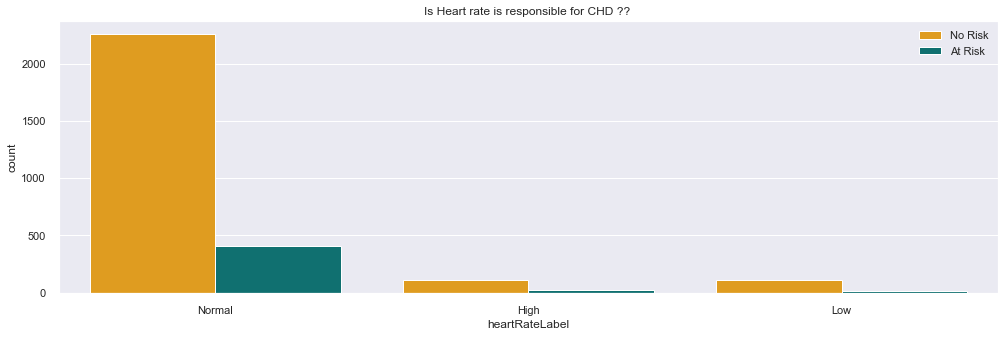

In [497]:
plt.figure(figsize = (15,5))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = train_df['heartRateLabel'], hue = train_df['TenYearCHD'], palette = my_palette)
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

Above graph clearly shows that The normal heart rate is at high No risk zone while remainig two we cant clearly tell. 

In [498]:
train_df.drop(columns=['heartRateLabel'], inplace=True )

# Are patients with blood pressure on medication at more risk of coronary heart disease ??

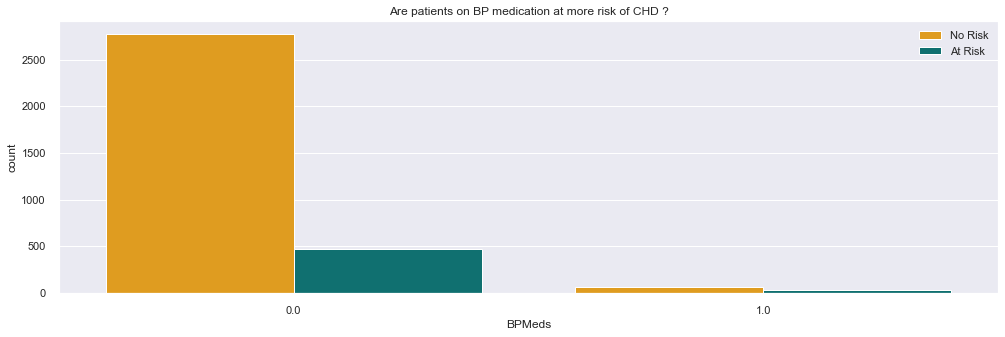

In [499]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (15,5))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

# how much smoking affect CHD?

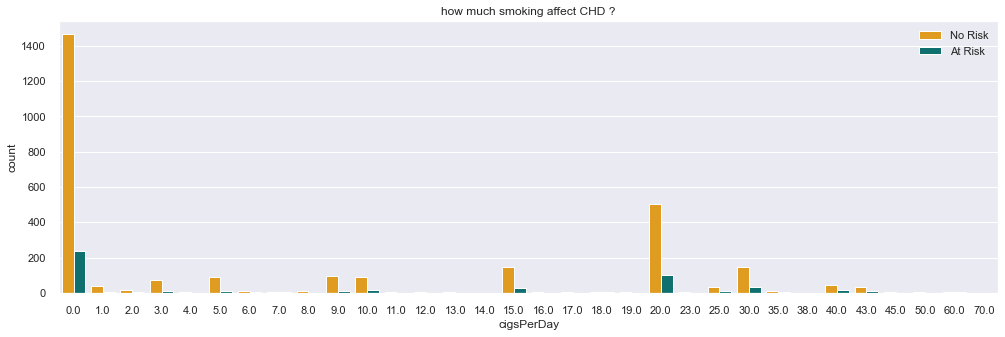

In [500]:
plt.figure(figsize = (15,5))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['cigsPerDay'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("how much smoking affect CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

Here, we are plotting the graph for the dependent variable along with the categorical variables present in the dataset.
We can conclude from here that,

(1) The people whoever already under the HyperTension, are at more risk of CVR

(2) Whether people smoke or not smoke, they are at risk of CVR.

(3) Its shocking to see that the people who never got any medication barely comes under the risk of CVR. The people who are under BP medications are at high risk of CVR.

(4) When we compare males and females, males are at more risk of CVR.

(5) We can clearly see that, the people who had only basic education i.e., education 1 are at more risk of CVR. And its gradually decreasing with increase in education. It might be because that the people wo are educated are taking much precaustions to avoid CVR.

(6) The non dibiatic patient are at much lower risk rather than dibiatic patient. 

# BMI with CHD risk 

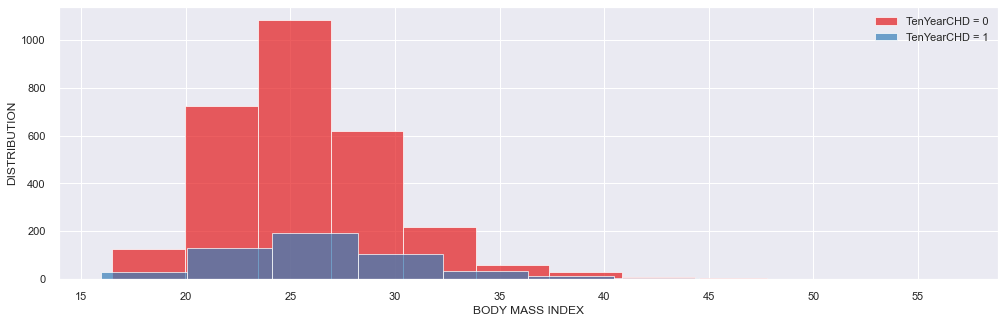

In [501]:
plt.figure(figsize=(15,5))

plt.hist(df['BMI'][df['TenYearCHD'] == 0], alpha = 0.7, label = 'TenYearCHD = 0')
plt.hist(df['BMI'][df['TenYearCHD'] == 1], alpha = 0.7, label = 'TenYearCHD = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('BODY MASS INDEX')
plt.legend()

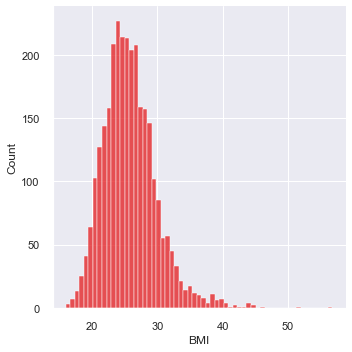

In [502]:
sns.displot(train_df['BMI'])

<AxesSubplot: xlabel='TenYearCHD', ylabel='BMI'>

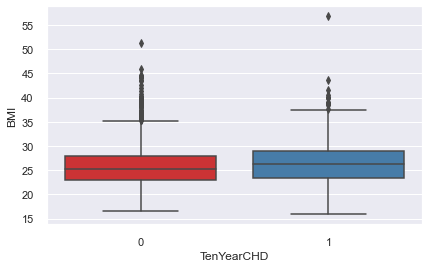

In [503]:
sns.boxplot(data=train_df,x='TenYearCHD',y='BMI')

Most of patient have BMI range between 20-30 which is good but there is not clear sign in significance of BMI and CHD 


**Age and CVR with other numerical columns**

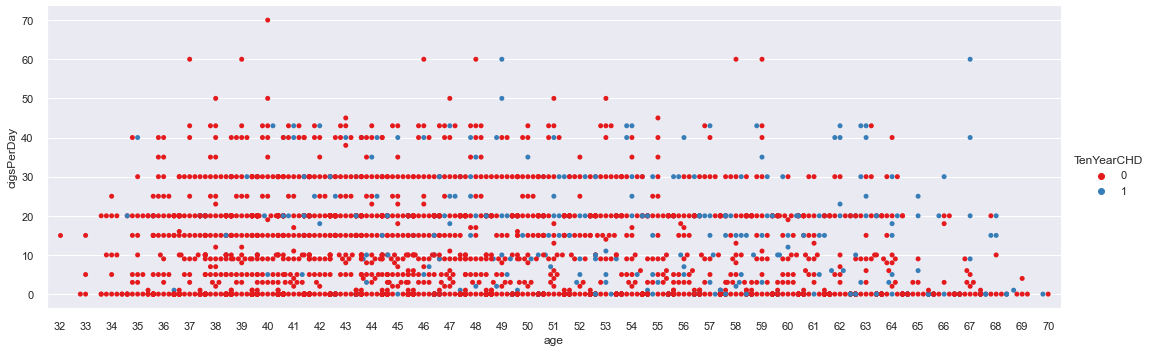

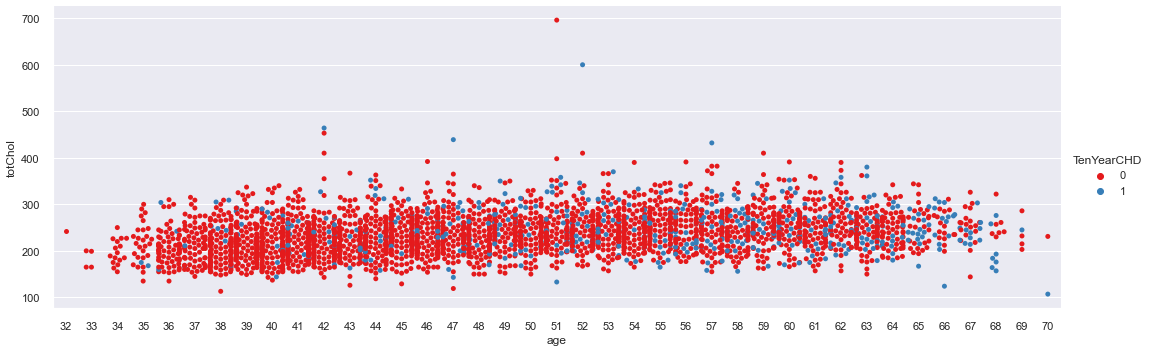

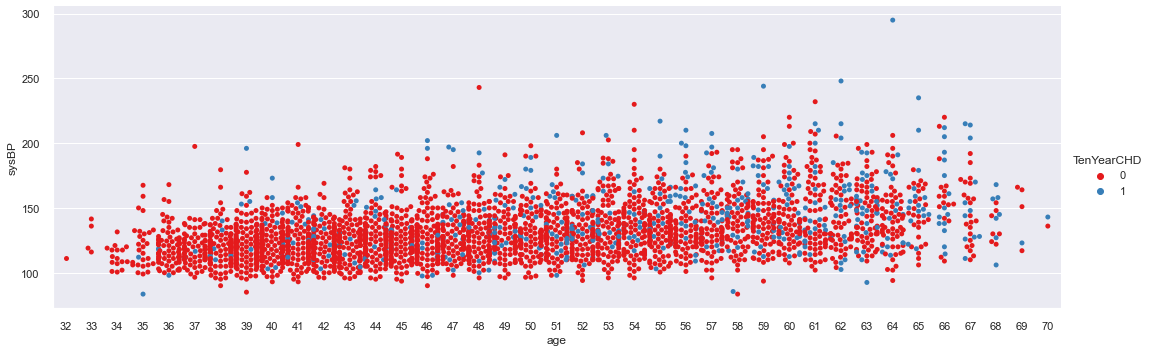

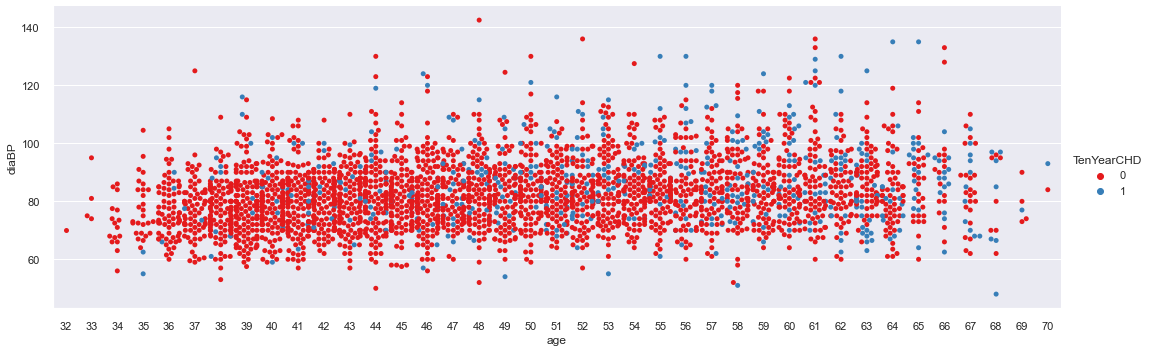

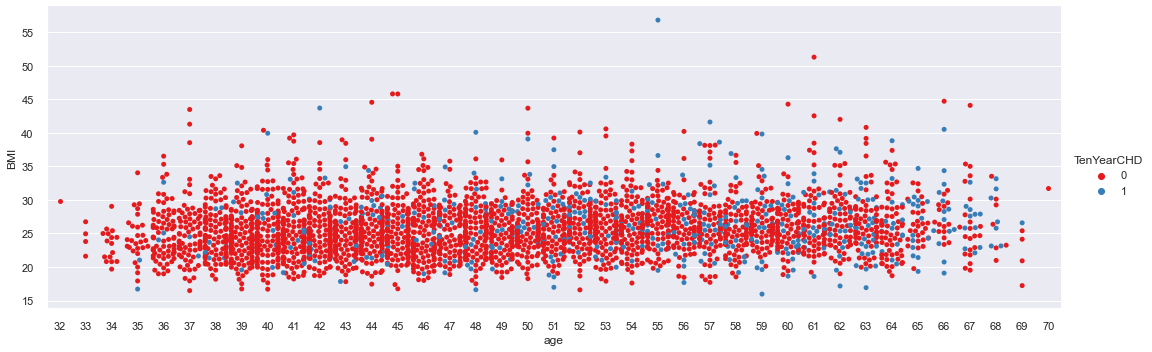

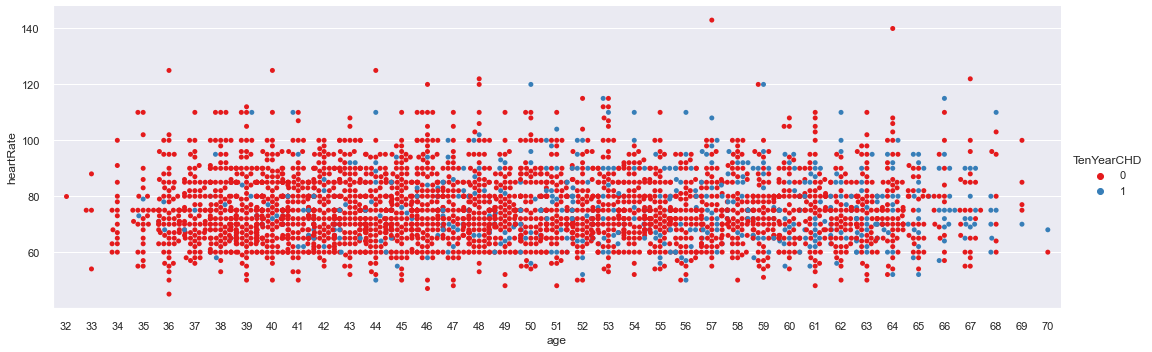

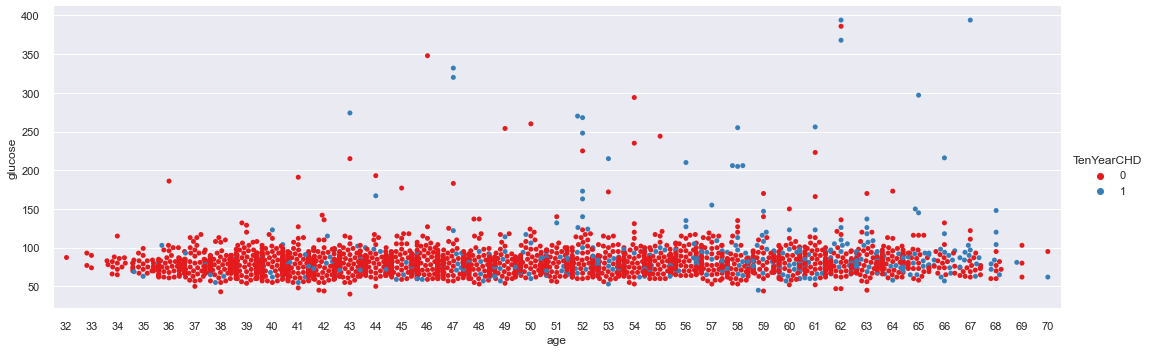

In [504]:
for i in numerical_columns:
  if i!='age':
    sns.catplot(x="age", y=i, hue="TenYearCHD", kind="swarm", data=df,height=5, aspect=3)

Here we can observe that,
(1) The people who were under the risk of CVR were from the age>34. And age did not matter to any of other numerical variables. We can see same level of measures such as BP, BMI etc., for all age group.

(2) The cholestrol level for these peple is slighly more when we compare it with the people who are not at risk of CVR. And at the age of 70, even though they were having slighly low level of cholestrol, they were at risk of CVR.

(3) If we consider sysBP, diaBP, heart rate and BMI together for the overall conclusion, we can conclude that all the people who are at risk are having high values of these measures than the people who are not at risk of CVR.

**Diabetes and CVR with other numerical columns**

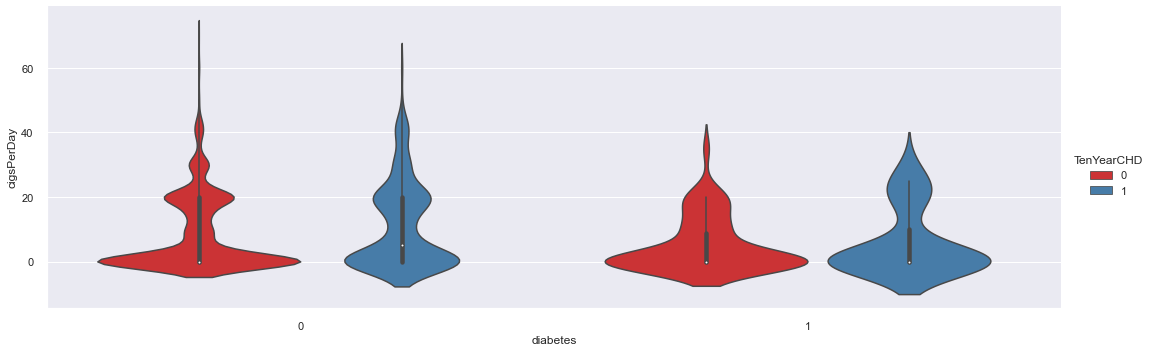

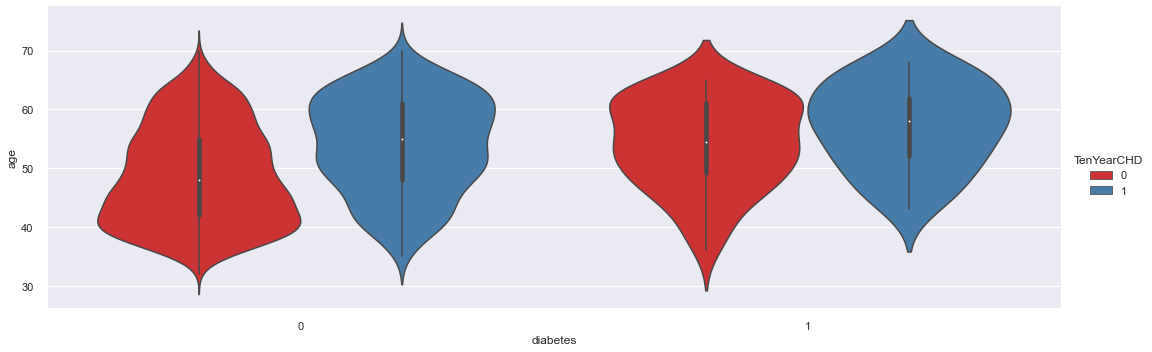

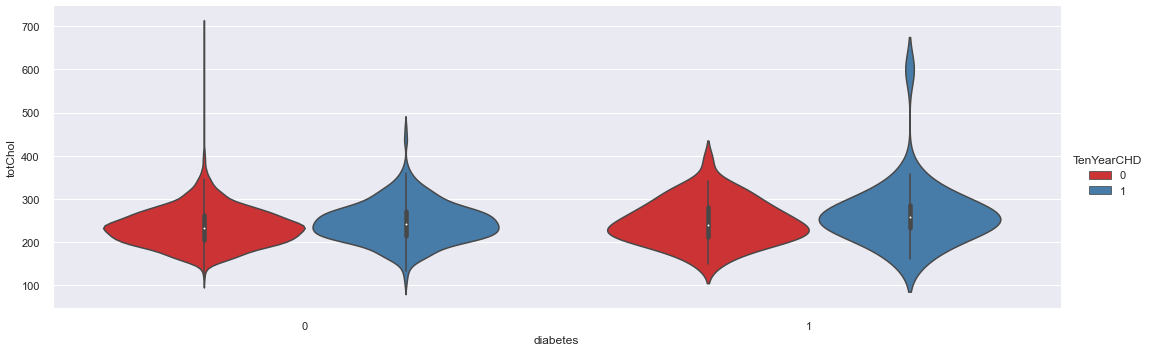

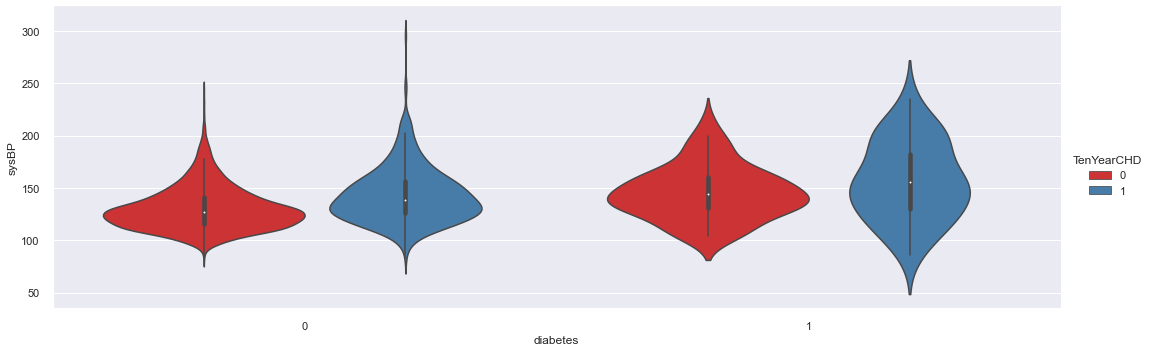

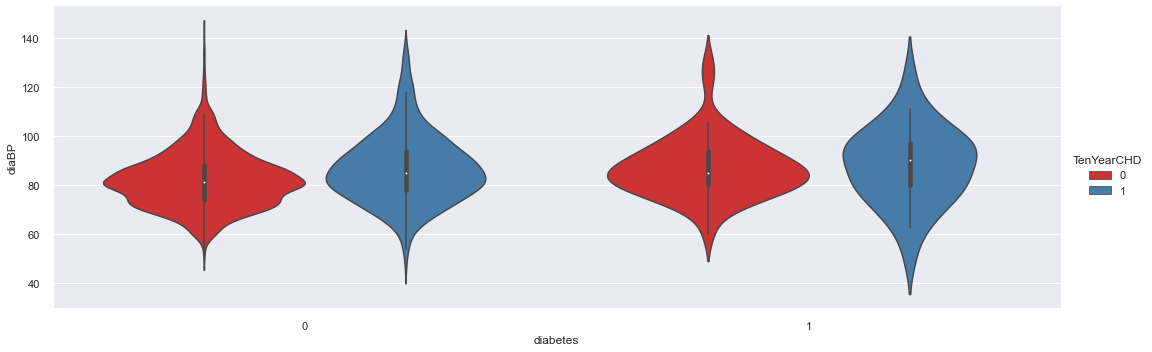

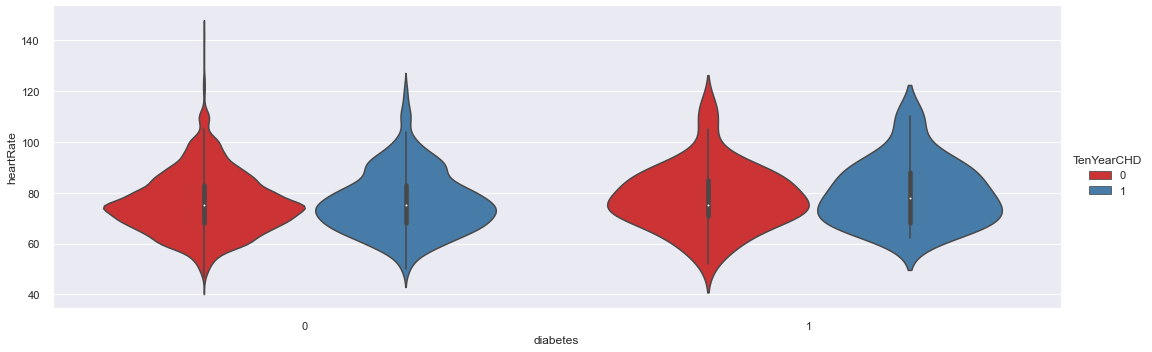

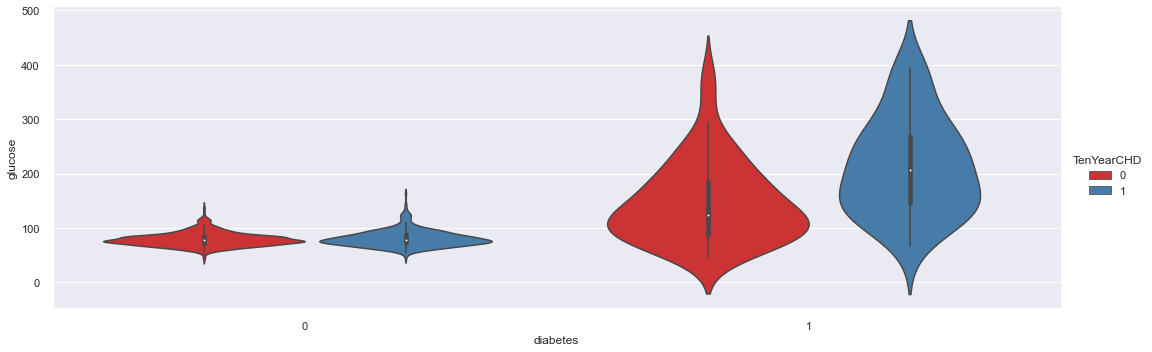

In [505]:
for i in numerical_columns:
  sns.catplot(x="diabetes", y=i, hue="TenYearCHD", kind="violin", data=df,height=5, aspect=3)


Here, we can observe that,
(1) Even though they had diabetes or not, they are at same level of risk of CVR. But its high between the age group 50-70.

(2) We say that cholestrol and diabetes are related, but from the data, its contrary to our assumption. Even though many people have very high level of high cholestrol, they were not at risk of diabetes nor CVR. But if people had diabetes and cholestrol levels are high then they are at high risk of CVR.

(3) BP and heartrate has nothing to do th the diabetes in here. Many people who are at risk of CVR and diabetes are actually maintaining a normal range of BP and heart rate.

(4) If people are already having diabetes and if they have high BMI then they are at high risk of CVR.

# Standardization - Min Max Scaler


**Distribution plot of all numerical variables**

Text(0.5, 0, 'Numerical variables')

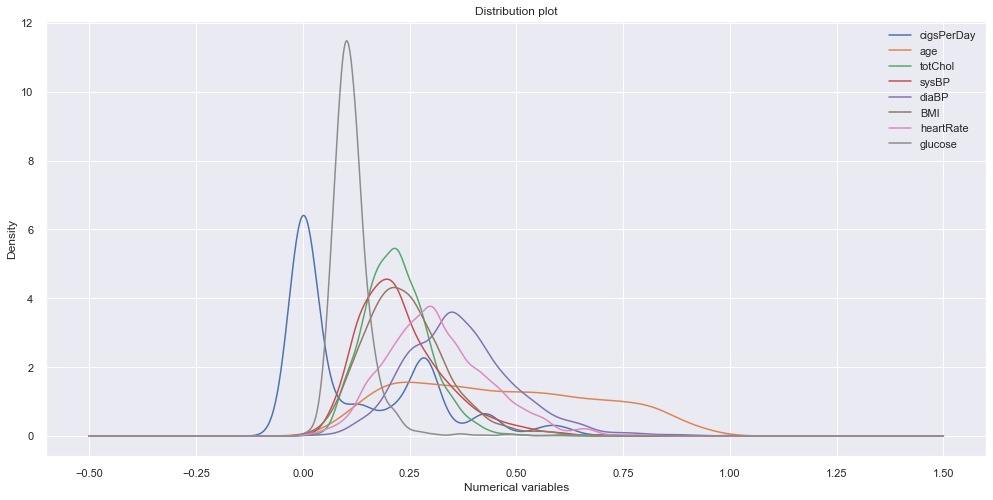

In [506]:
#Min max scaler
column_names = numerical_columns
# column_names
#taking columns to do the minmaxscaling
cardio_2 = pd.DataFrame()
#using standardization as both numeric columns are in different scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[numerical_columns])
#print(scaled)
cardio_2 = pd.DataFrame(scaler.fit_transform(df[numerical_columns]))
cardio_2.columns = column_names

sns.set(rc = {'figure.figsize':(15,8)})
cardio_2.plot.kde()
plt.title("Distribution plot")
plt.xlabel("Numerical variables")

We can observe that there are many people with high level of glucose followed by cig_per_day and total cholestrol. It might be that the lifestyle of people are contributing more to these values. So we observe some peaks in these vlaues.

# Transformation

Data transformation includes data cleaning techniques and a data reduction technique to convert the data into the appropriate form. Data transformation is an essential data preprocessing technique that must be performed on the data before data mining to provide patterns that are easier to understand.

In [507]:
# Applying transformation and looking the graph before and after transformation

import scipy.stats as stats
import pylab

def to_plot(DF,column):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.distplot(DF[column])
  plt.subplot(1,2,2)
  stats.probplot(DF[column],dist='norm',plot=pylab)
  plt.show()

def log_transform(DF,column):
  print("Before Transformation")
  to_plot(DF,column)
  # applying log transformation
  DF[column]=np.log1p(DF[column])
  #plotting
  print("After Transformation")
  to_plot(DF,column)
  # stats.probplot()

def box_cox_transform(DF,column):
  print("Before Transformation")
  to_plot(DF,column)
  # applying boxcox transformation
  DF[column],parameters=stats.boxcox(DF[column])
  print("After Transformation")
  to_plot(DF,column)
numerical_columns = ['age', 'totChol', 'BMI', 'heartRate', 'glucose']
#updating as we deleted sysBP and diaBP

In [508]:
numerical_columns = ['age','cigsPerDay' 'totChol', 'BMI', 'heartRate', 'glucose']
#updating as we deleted sysBP and diaBP

Before Transformation


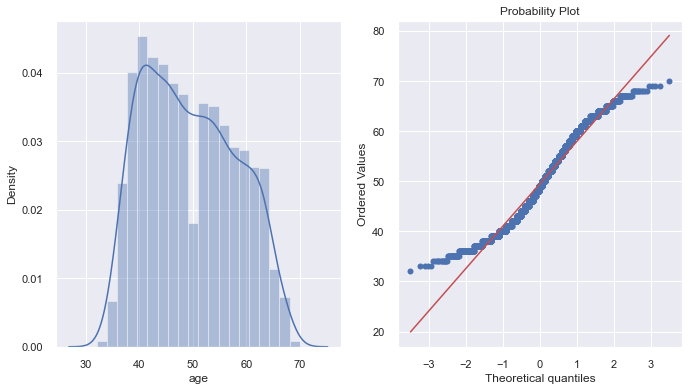

After Transformation


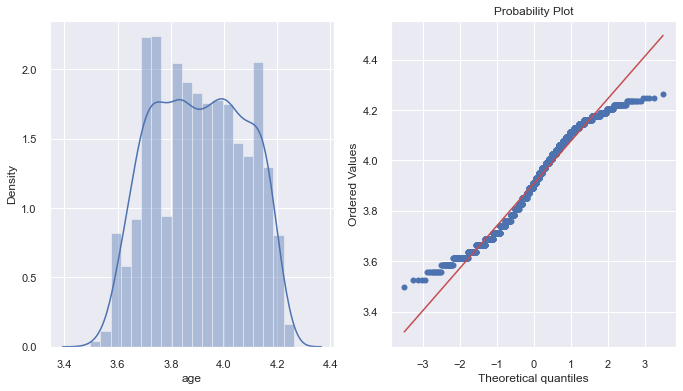

Before Transformation


After Transformation


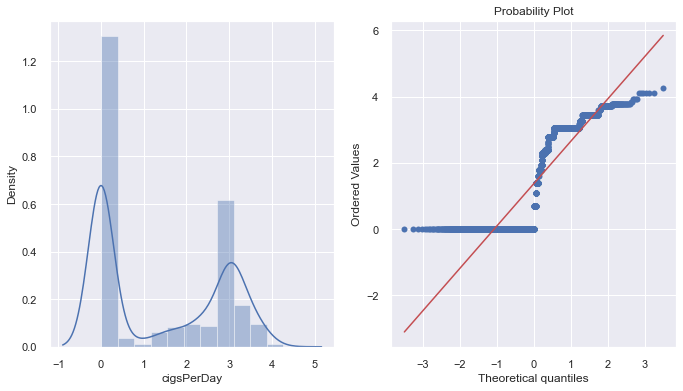

Before Transformation


After Transformation


Before Transformation


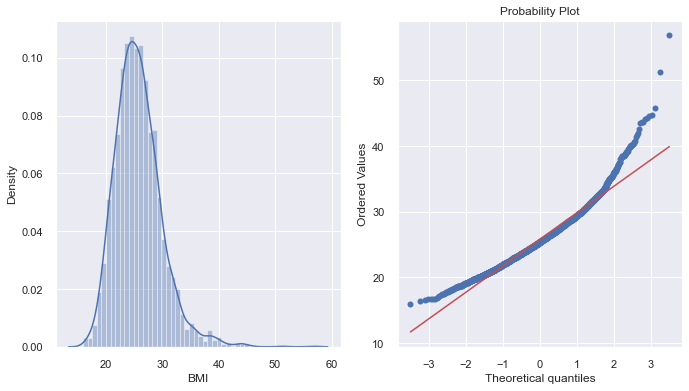

After Transformation


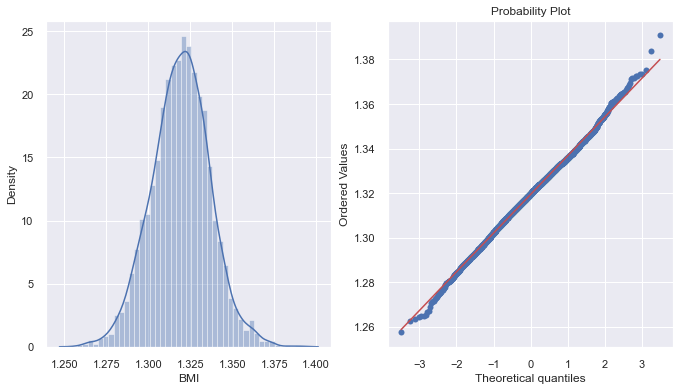

Before Transformation


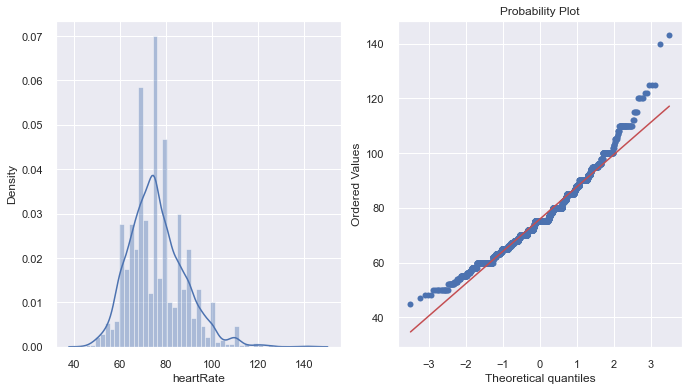

After Transformation


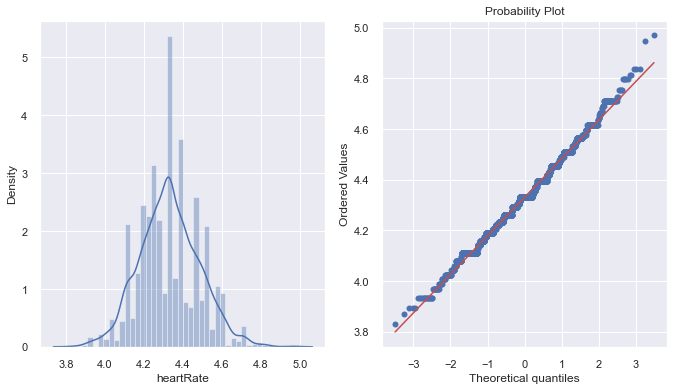

Before Transformation


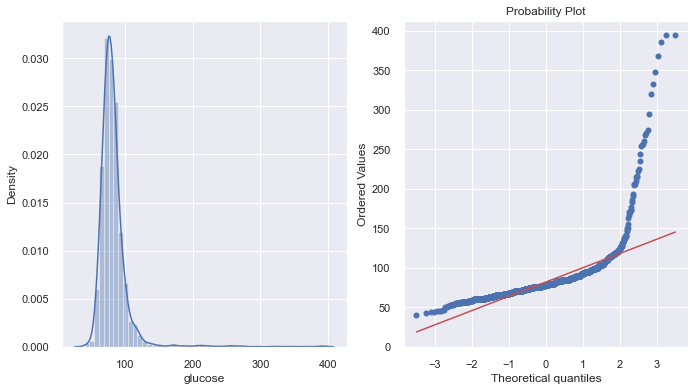

After Transformation


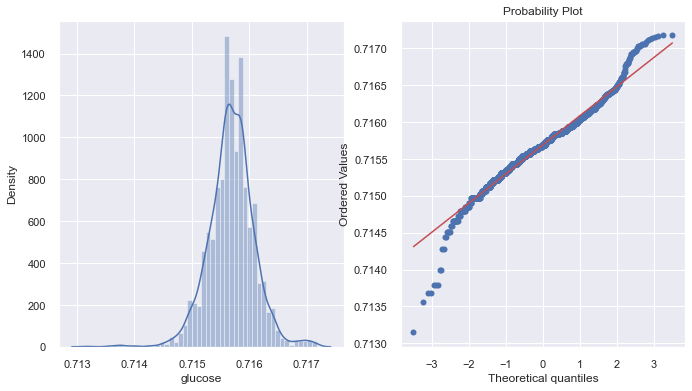

In [509]:
#Applying the transformaation to only numerical columns
log_transform(train_df,'age')
log_transform(train_df,'cigsPerDay')
log_transform(train_df,'totChol')
box_cox_transform(train_df,'BMI')
log_transform(train_df,'heartRate')
box_cox_transform(train_df,'glucose')

# Feature Engineering 

## Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.

In [510]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

train_df['Hypertension'] = train_df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
train_df.head()

id       age  education sex is_smoking  cigsPerDay  BPMeds  \
1   1  3.610918        4.0   M         NO    0.000000     0.0   
2   2  3.850148        1.0   F        YES    2.397895     0.0   
3   3  3.931826        1.0   M        YES    3.044522     0.0   
4   4  4.174387        1.0   F        YES    3.433987     0.0   
5   5  4.127134        3.0   F         NO    0.000000     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol  sysBP  diaBP       BMI  \
1                0             1         0  5.361292  168.0   98.0  1.337051   
2                0             0         0  5.525453  116.0   71.0  1.292627   
3                0             1         0  5.455321  158.0   88.0  1.331621   
4                0             0         0  5.488938  136.5   85.0  1.324311   
5                0             1         0  5.609472  182.0  121.0  1.346670   

   heartRate   glucose  TenYearCHD  Hypertension  
1   4.290459  0.715601           0             5  
2   4.488636  0.716073           0             1  
3   4.234107  0.716073           1             3  
4   4.262680  0.715664           0             2  
5   4.454347  0.715216           1             7

## Blood glucose levels can be used to classify the severity of Diabetes.

In [511]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

train_df['Diabetes'] = train_df['glucose'].apply(lambda x: diabetes_grade(x))
train_df.head()

id       age  education sex is_smoking  cigsPerDay  BPMeds  \
1   1  3.610918        4.0   M         NO    0.000000     0.0   
2   2  3.850148        1.0   F        YES    2.397895     0.0   
3   3  3.931826        1.0   M        YES    3.044522     0.0   
4   4  4.174387        1.0   F        YES    3.433987     0.0   
5   5  4.127134        3.0   F         NO    0.000000     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol  sysBP  diaBP       BMI  \
1                0             1         0  5.361292  168.0   98.0  1.337051   
2                0             0         0  5.525453  116.0   71.0  1.292627   
3                0             1         0  5.455321  158.0   88.0  1.331621   
4                0             0         0  5.488938  136.5   85.0  1.324311   
5                0             1         0  5.609472  182.0  121.0  1.346670   

   heartRate   glucose  TenYearCHD  Hypertension  Diabetes  
1   4.290459  0.715601           0             5         1  
2   4.488636  0.716073           0             1         1  
3   4.234107  0.716073           1             3         1  
4   4.262680  0.715664           0             2         1  
5   4.454347  0.715216           1             7         1

The absolute number of cigarettes per day is not much useful variable because the stiffness of blood vessels increases as the number of cigarettes consumed per day increases. So new feature containing log-transformed value could be more useful.

In [512]:
# New factor taking smoking factor into account 
train_df['SmokingFactor'] = train_df['cigsPerDay'].apply(lambda x: 0 if x < 1 else np.log(x))
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [521]:
# remove not useful columns
train_df.drop(columns=['id', 'prevalentHyp', 'sysBP', 'diaBP', 'diabetes', 'is_smoking', 'cigsPerDay'], inplace=True)

KeyError: "['id', 'prevalentHyp', 'sysBP', 'diaBP', 'diabetes', 'is_smoking', 'cigsPerDay'] not found in axis"

# Checing Multicollinearity

Multicollinearity should be checked till we build models to make sure that we are not adding any variables with high correlation.

<AxesSubplot: >

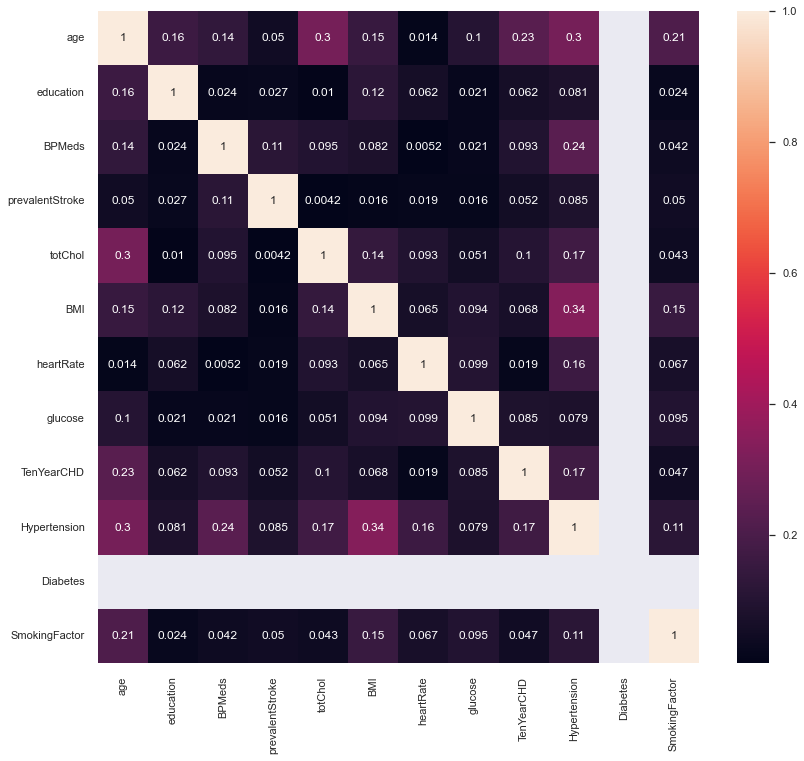

In [514]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(12,12))
correlation = train_df.corr()
sns.heatmap(abs(correlation), annot=True)

## In above multicolinearity we can see there is no significant correlation with dependant variable 

## Distribution of all numerical variables by plotting histogram

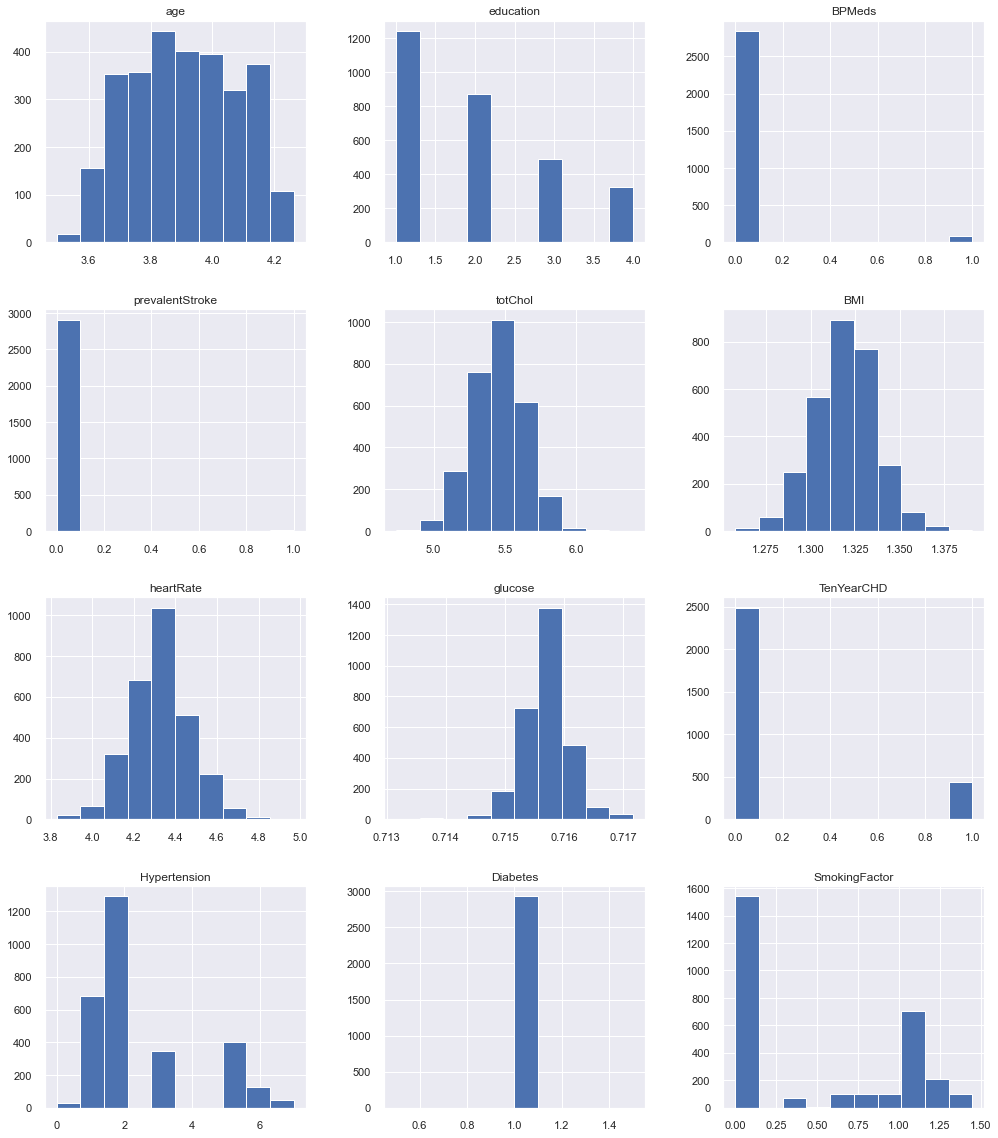

In [515]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_df.hist(ax = ax)
plt.show()

In [523]:
train_df.drop(columns=['BPMeds', 'prevalentStroke'], inplace=True)

## converting categorical data into numerical data 

In [516]:
train_df['sex'] = train_df['sex'].apply(lambda x: 1 if x == 'M' else 0)

In [517]:
train_df.head(25)

age  education  sex  BPMeds  prevalentStroke   totChol       BMI  \
1   3.610918        4.0    1     0.0                0  5.361292  1.337051   
2   3.850148        1.0    0     0.0                0  5.525453  1.292627   
3   3.931826        1.0    1     0.0                0  5.455321  1.331621   
4   4.174387        1.0    0     0.0                0  5.488938  1.324311   
5   4.127134        3.0    0     0.0                0  5.609472  1.346670   
6   4.127134        1.0    1     0.0                0  5.476464  1.317273   
7   3.610918        4.0    1     0.0                0  5.690359  1.331207   
11  3.988984        2.0    0     0.0                0  5.351858  1.305424   
12  3.784190        2.0    0     0.0                0  5.365976  1.286058   
13  3.806662        1.0    1     0.0                0  5.429346  1.326380   
14  4.077537        3.0    0     0.0                0  5.241747  1.354274   
15  3.951244        1.0    1     0.0                0  5.361292  1.315669   
16  3.931826        1.0    0     0.0                0  5.484797  1.342324   
17  3.806662        3.0    0     0.0                0  5.552960  1.328936   
18  4.043051        3.0    0     0.0                0  5.590987  1.314369   
19  3.761200        1.0    1     0.0                0  5.451038  1.321521   
20  3.761200        1.0    0     0.0                0  5.298317  1.371717   
21  3.663562        2.0    0     0.0                0  5.170484  1.302735   
22  3.663562        1.0    0     0.0                0  5.105945  1.321434   
23  4.158883        1.0    0     0.0                0  5.424950  1.324521   
24  3.583519        2.0    0     0.0                0  5.517453  1.294491   
25  3.806662        1.0    1     0.0                0  5.398163  1.296806   
26  3.610918        3.0    1     0.0                0  5.505332  1.314611   
27  4.007333        2.0    1     0.0                0  5.634790  1.324521   
28  3.737670        2.0    1     0.0                0  5.505332  1.314563   

    heartRate   glucose  TenYearCHD  Hypertension  Diabetes  SmokingFactor  
1    4.290459  0.715601           0             5         1       0.000000  
2    4.488636  0.716073           0             1         1       0.874591  
3    4.234107  0.716073           1             3         1       1.113344  
4    4.262680  0.715664           0             2         1       1.233722  
5    4.454347  0.715216           1             7         1       0.000000  
6    4.330733  0.715723           0             7         1       0.000000  
7    4.110874  0.715121           0             1         1       1.276345  
11   4.488636  0.715928           0             3         1       0.000000  
12   4.317488  0.715752           0             1         1       0.000000  
13   4.394449  0.715304           0             5         1       1.311994  
14   4.488636  0.715881           0             6         1       0.000000  
15   4.615121  0.716553           1             3         1       1.019781  
16   4.499810  0.715601           0             6         1       0.000000  
17   4.330733  0.715633           0             2         1       0.000000  
18   4.532599  0.716178           0             2         1       0.000000  
19   4.290459  0.715425           0             3         1       1.233722  
20   4.394449  0.714965           1             5         1       1.113344  
21   4.418841  0.715534           0             3         1       0.000000  
22   4.262680  0.715601           0             1         1       1.233722  
23   4.477337  0.715779           0             5         1       0.000000  
24   4.510860  0.715752           0             1         1       0.000000  
25   4.077537  0.715346           0             1         1       0.874591  
26   4.382027  0.715881           0             2         1       1.019781  
27   4.369448  0.715261           0             5         1       0.326634  
28   4.454347  0.715694           0             3         1       0.000000

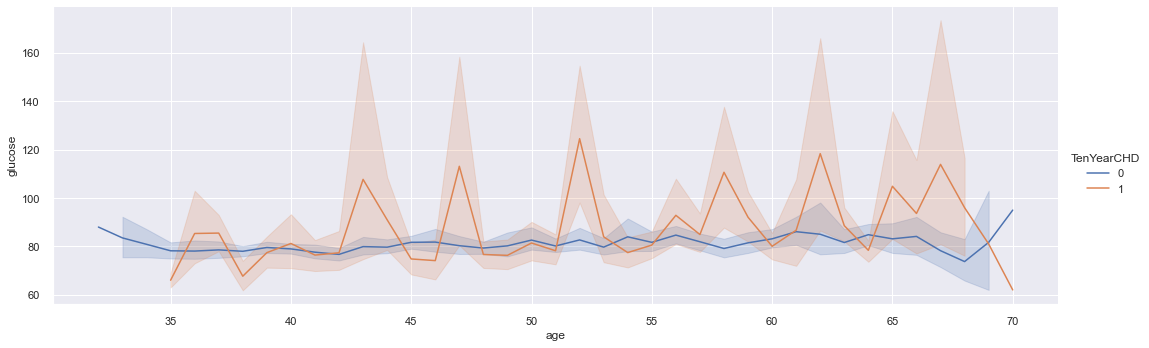

In [518]:
sns.relplot(x="age", y='glucose', hue="TenYearCHD", kind='line', data=df,height=5, aspect=3,dashes=False, markers=True)

In [519]:
df['glucose'].isna().sum()

304

# Train Test Split

Defining Dependent variable and Independent variable

In [662]:
dependent_variable = 'TenYearCHD'
independent_variable = list(train_df.columns)
independent_variable.remove(dependent_variable)
print(independent_variable)

['age', 'education', 'sex', 'totChol', 'BMI', 'heartRate', 'glucose', 'Hypertension', 'Diabetes', 'SmokingFactor']


In [663]:
X = train_df[independent_variable].values
y = train_df[dependent_variable].values

**Treat Class imbalance by SMOTE or MSMOTE**

Let's Resample the dataset to over come this imbalance. We will apply SMOTE (Synthetic Minority Oversampling Technique) to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [666]:
# Balancing the data using SMOTE

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

#using class_wieghts

class_weight = {0: 1, 1: 6}

{0: 2483, 1: 444} {0: 2482, 1: 1986}


In [667]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2)

In [668]:
# scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# Building All Models

# K Nearest Neighbour 

In [669]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test)

# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.96642417 0.89703414 0.90039172 0.85730274 0.85646335
 0.82428651 0.82344712 0.80442082 0.80386122]
Test Accuracy:  [0.8098434  0.82438479 0.77181208 0.78076063 0.74384787 0.75279642
 0.74272931 0.74272931 0.73378076 0.7393736 ]


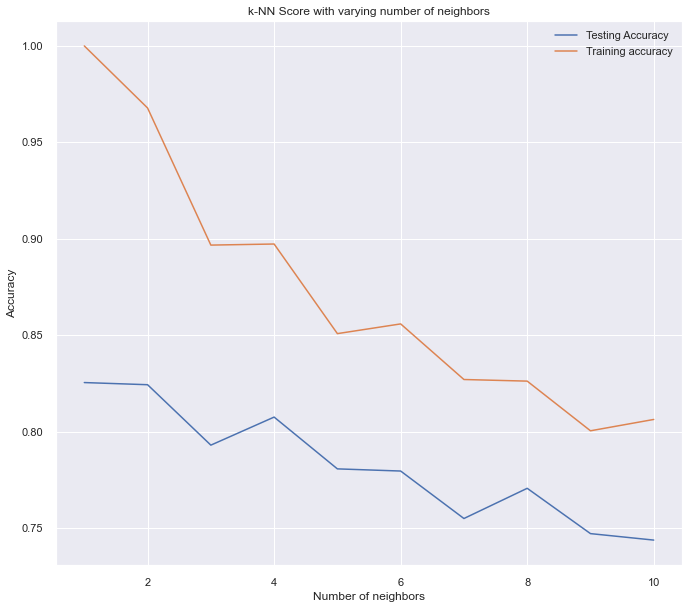

In [604]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can see that test score is increasing as number of neighbours increases.

**Hyper parameter tuning - KNN**

Let's try to find best parameter for knn.

In [670]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [671]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [672]:
knn_cv.best_score_

0.8097396720926133

In [673]:
knn_cv.best_params_

{'n_neighbors': 2}

In [609]:
# predictions
knn_predict = knn_cv.predict(X_test)
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       508
           1       0.74      0.91      0.82       386

    accuracy                           0.83       894
   macro avg       0.83      0.84      0.83       894
weighted avg       0.84      0.83      0.83       894



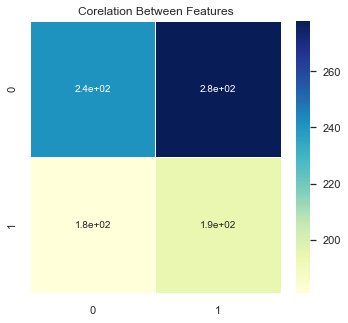

In [674]:
conf_mat = confusion_matrix(y_test, knn_predict)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

# Logistic Regression

In [675]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [676]:
# Get the model coefficients
logistic_regression_model.coef_

array([[ 0.72358036, -0.07712678,  0.17251793,  0.14423893,  0.03567847,
        -0.09111376,  0.15948389,  0.29380923,  0.        ,  0.35799798]])

In [613]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [614]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6712367095691102
The accuracy on test data is  0.6644295302013423


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

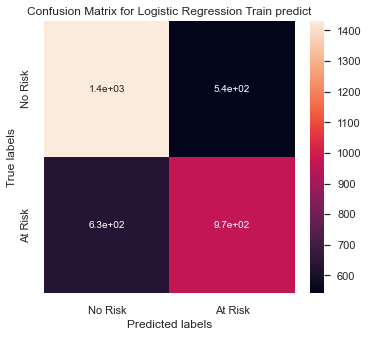

In [615]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[363 145]
 [155 231]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

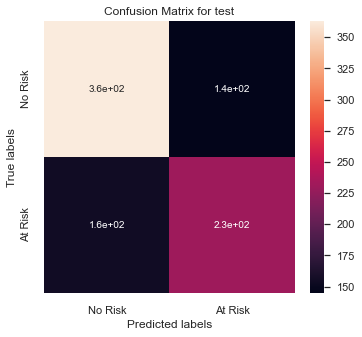

In [616]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [618]:
#hyper parameter tunning for logistic regression 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [636]:
param_grid_lgr={"C":np.logspace(-5,8,15), "penalty":["l1","l2"]}
logreg = LogisticRegression()

In [637]:
logreg_cv=GridSearchCV(logreg,param_grid_lgr,cv=10)
logreg_cv.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']})

In [621]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213, 'penalty': 'l2'}
Best score is 0.671246263868676


In [566]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))

# Print the classification report for train and test
print(f'Training data is{classification_report(y_train, train_preds)}')
print("\n")
print('Test Data', classification_report(y_test, test_preds))

ROCAUC score: 0.7889765583242129
Accuracy score: 0.8109619686800895
Training data is              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1977
           1       0.96      0.65      0.78      1597

    accuracy                           0.83      3574
   macro avg       0.87      0.82      0.82      3574
weighted avg       0.86      0.83      0.83      3574



Test Data               precision    recall  f1-score   support

           0       0.77      0.96      0.85       505
           1       0.92      0.62      0.74       389

    accuracy                           0.81       894
   macro avg       0.84      0.79      0.80       894
weighted avg       0.83      0.81      0.80       894



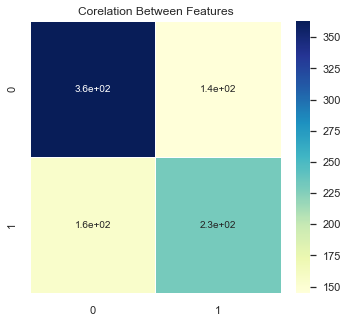

In [622]:
conf_mat = confusion_matrix(y_test, test_preds)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

# Building Desicion Tree Model

Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [678]:
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

In [679]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [625]:

#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 71.02908277404921
the training accuracy is 76.77672076105205


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_model,filled=True)

[[1512  462]
 [ 368 1232]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

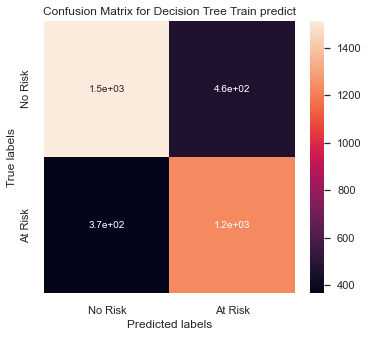

In [626]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[369 139]
 [120 266]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

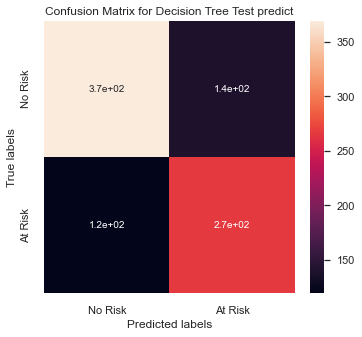

In [627]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [628]:
#classification report for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1974
           1       0.73      0.77      0.75      1600

    accuracy                           0.77      3574
   macro avg       0.77      0.77      0.77      3574
weighted avg       0.77      0.77      0.77      3574



**Hyperparameter tunning - Decision tree**

In [629]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid 
param_dist = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating GridSearchCV object
tree_cv = GridSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best score is 0.7299915770504006


In [630]:
tree_pred = tree_cv.predict(X_test)
print(classification_report(y_test,tree_pred,digits=4))

              precision    recall  f1-score   support

           0     0.7515    0.7618    0.7566       508
           1     0.6807    0.6684    0.6745       386

    accuracy                         0.7215       894
   macro avg     0.7161    0.7151    0.7156       894
weighted avg     0.7209    0.7215    0.7212       894



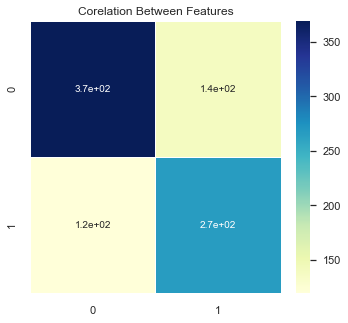

In [631]:
conf_mat = confusion_matrix(y_test, test_preds)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

# AdaBoost Classification

In [681]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.grid_search import GridSearchCV

param_grid_adb = {
    'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]
             }


#DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

adb = AdaBoostClassifier()

# run grid search
adaboost_cv = GridSearchCV(adb, param_grid=param_grid_adb, cv = 5)
adaboost_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(adaboost_cv.best_params_))
print("Best score is {}".format(adaboost_cv.best_score_))

Tuned Decision Tree Parameters: {'learning_rate': 0.3, 'n_estimators': 500}
Best score is 0.7456633562515915


In [682]:
adb_pred = adaboost_cv.predict(X_test)
print(classification_report(y_test,adb_pred,digits=4))

              precision    recall  f1-score   support

           0     0.7820    0.8015    0.7916       519
           1     0.7155    0.6907    0.7028       375

    accuracy                         0.7550       894
   macro avg     0.7487    0.7461    0.7472       894
weighted avg     0.7541    0.7550    0.7544       894



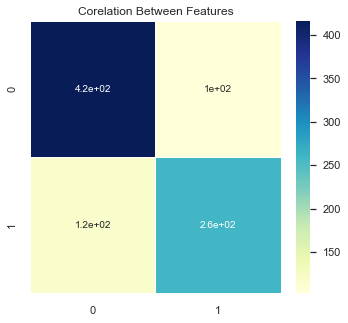

In [683]:
conf_mat = confusion_matrix(y_test, adb_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

# SVC

In [632]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid_sv = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)
 
# fitting the model for grid search
svm_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.587 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.571 total time=   0.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.583 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.584 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.669 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.678 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.699 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.681 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.855 total time=   0.5s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.871 total time=   0.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.863 total time=   0.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.846 total time=   0.5s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.792 total time=   2.9s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.792 total time=   3.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.792 total time=   2.9s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.804 total time=   3.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.776 total time=   3.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.734 total time=   1.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.684 total time=   1.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.719 total time=   1.5s
[CV 4/5] END ....C=1000, gam

In [633]:
svm_pred = svm_cv.predict(X_test)
print(classification_report(y_test,svm_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8942    0.8819    0.8880       508
           1     0.8473    0.8627    0.8549       386

    accuracy                         0.8736       894
   macro avg     0.8708    0.8723    0.8715       894
weighted avg     0.8740    0.8736    0.8737       894



[[448  60]
 [ 53 333]]


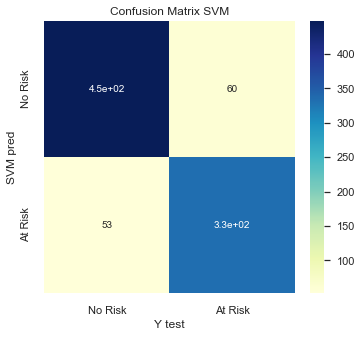

In [634]:
conf_mat = confusion_matrix(y_test, svm_pred)
print(conf_mat)
plt.rcParams['figure.figsize'] = (5, 5) 

ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, ax = ax, cmap = 'YlGnBu') #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Y test')
ax.set_ylabel('SVM pred')
ax.set_title('Confusion Matrix SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# ROC curve after Hyper Parameter Tuning

In [687]:
models = [['Adaboost', AdaBoostClassifier(random_state=42)],
          ['Decision Tree', DecisionTreeClassifier()],
          ['Decision Tree after Hyperparameter Tuning',GridSearchCV(tree, param_dist, cv = 5)],
          ['KNN', KNeighborsClassifier(n_neighbors=79)],
          ['KNN after Hyperparameter tuning ', KNeighborsClassifier(n_neighbors=5)],
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['Logistic Regression after Hyperparameter Tuning',GridSearchCV(logreg, param_grid_lgr,cv = 5)],
          ['SVM', SVC(random_state=6)],
          ['SVM after Hyperparameter Tuning',GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)]
          ]

In [688]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.568 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.564 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.564 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.565 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.569 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.662 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.680 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.678 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.666 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.864 total time=   0.8s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.871 total time=   0.8s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.859 total time=   0.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.860 total time=   0.6s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.783 total time=   3.7s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.810 total time=   3.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.829 total time=   3.2s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.821 total time=   2.9s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.798 total time=   3.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.691 total time=   1.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.701 total time=   1.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.716 total time=   1.5s
[CV 4/5] END ....C=1000, gam

In [689]:
model_2_data = pd.DataFrame(model_1_data)
# model_1_data = model_1_data.sort_values('train_accuracy',ascending=False)
model_2_data

Name  Train_accuracy  \
0                                         Adaboost        0.742865   
1                                    Decision Tree        1.000000   
2        Decision Tree after Hyperparameter Tuning        0.896475   
3                                              KNN        0.692222   
4                 KNN after Hyperparameter tuning         0.857303   
5                              Logistic Regression        0.664801   
6  Logistic Regression after Hyperparameter Tuning        0.665081   
7                                              SVM        0.763290   
8                  SVM after Hyperparameter Tuning        0.977057   

   Test_accuracy  Precision    Recall  F1_Score  
0       0.719239   0.763006  0.755725  0.759348  
1       0.777405   0.795761  0.816206  0.805854  
2       0.741611   0.791908  0.769663  0.780627  
3       0.695749   0.703276  0.755694  0.728543  
4       0.743848   0.651252  0.875648  0.746961  
5       0.663311   0.734104  0.700368  0.716839  
6       0.663311   0.734104  0.700368  0.716839  
7       0.714765   0.751445  0.755814  0.753623  
8       0.862416   0.876686  0.885214  0.880929

classifiers = [GridSearchCV(adb, param_grid=param_grid_adb, cv = 5),GridSearchCV(tree, param_dist, cv = 5),
               KNeighborsClassifier(n_neighbors=5),GridSearchCV(logreg, param_grid_lgr, cv = 5),
               GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)]
classifiers_names = ['Adaboost','Decision tree','KNN','Logistic Regression','SVM']
training,testing = [],[]
for i in classifiers:
    i.fit(X_train, y_train)
    train_y_predicted = i.predict(X_train)
    test_y_predicted = i.predict(X_test)
    tr = round(accuracy_score(y_train,train_y_predicted),4)
    ts = round(accuracy_score(y_test,test_y_predicted),4)
    training.append(tr)
    testing.append(ts)

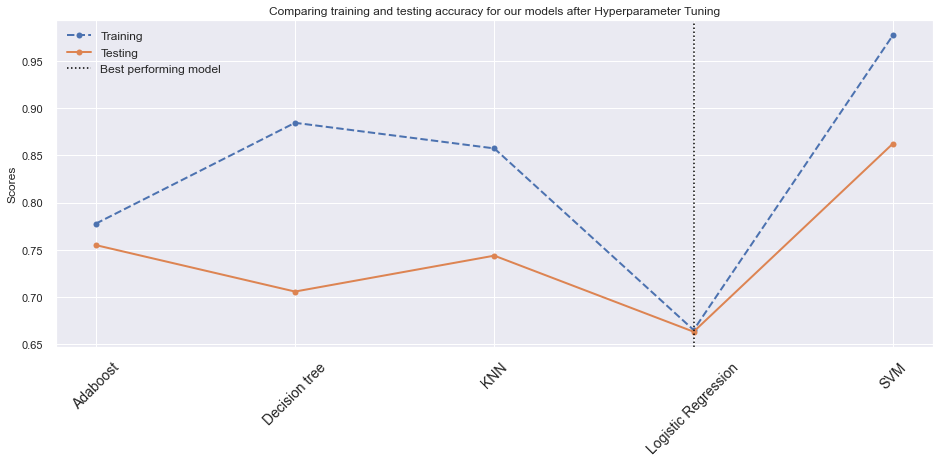

In [693]:
diff = np.array(training)-np.array(testing)

plt.figure(figsize=(14,6))
plt.plot(range(0,len(classifiers)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(classifiers)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(classifiers)), classifiers_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing accuracy for our models after Hyperparameter Tuning")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

# Coclusion 
The best train and test score we got from SVC (Support Vector Classifier), but above graph shows that best performing model is Logestic regression. 